In [645]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from matplotlib import pyplot
import math
import numpy as np
from sklearn import preprocessing 

In [646]:
DS = pd.read_csv("C:\\Users\\dhruv\\Downloads\\Housing.csv")

In [647]:
train=DS.sample(frac=0.8,random_state=0) 
test=DS.drop(train.index)

In [648]:
DS

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [649]:
train = train[['price','area','bedrooms','bathrooms','stories','parking']]
test = test[['price','area','bedrooms','bathrooms','stories','parking']]

In [650]:
scaler = preprocessing.MinMaxScaler()

In [651]:
X1_t = np.array(train.area)
X2_t = np.array(train.bedrooms)
X3_t = np.array(train.bathrooms)
X4_t = np.array(train.stories)
X5_t = np.array(train.parking)

X0_t= np.ones(436)

X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])
X = X.T
X = np.array(X)   
x = scaler.fit_transform(X)
X= x
X

array([[0.        , 0.16151203, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.54776632, 0.4       , 0.        , 0.        ,
        0.66666667],
       [0.        , 0.12439863, 0.6       , 0.        , 0.33333333,
        0.        ],
       ...,
       [0.        , 0.13402062, 0.4       , 0.        , 0.33333333,
        0.33333333],
       [0.        , 0.08247423, 0.4       , 0.33333333, 0.33333333,
        0.        ],
       [0.        , 0.21649485, 0.4       , 0.        , 0.        ,
        0.        ]])

In [652]:
Y_t = np.array(train.price)
Y = Y_t
Y = Y_t.reshape(436,1)
y = scaler.fit_transform(Y)
Y=y

In [653]:
#weights and bias column
theta = np.array([0., 0., 0., 0., 0., 0.])
theta = theta.reshape(6,1)
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [654]:
#Data Array
t_c = Y #PRICE(Actual Y's or Data(price))
t_u = X #Epochs(Actual X's ...multidimentional)

In [655]:
t_c = torch.tensor(t_c, dtype=torch.float64)#.to_numpy()
t_u = torch.tensor(t_u, dtype=torch.float64)

In [656]:
t_c= np.array(t_c)
t_u= np.array(t_u)
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [657]:
#Weights and Bias as column
b = torch.zeros(1)
w5 = torch.ones(1)
w4 = torch.ones(1)
w3 = torch.ones(1)
w2 = torch.ones(1)
w1 = torch.ones(1)

In [658]:
theta = [b, w1,w2, w3, w4, w5]
theta = torch.tensor(theta).reshape(6,1)

In [659]:
#Model definition linear
def model(X, theta):
    return np.matmul(X, theta)

In [660]:
#Loss function
def loss_func(t_p, t_c):
    var = (t_p - t_c)**2
    return var.mean()

In [661]:
t_p = model(X, theta)
#t_p = torch.tensor(t_p)

In [662]:
loss = loss_func(t_p, t_c)
loss

tensor(1.1408, dtype=torch.float64)

In [663]:
def b_del(delta):
    b_del = [delta, 0,0,0,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w5_del(delta):
    b_del = [0, delta,0,0,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w4_del(delta):
    b_del = [0, 0,delta,0,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w3_del(delta):
    b_del = [0, 0,0,delta,0,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w2_del(delta):
    b_del = [0, 0,0,0,delta,0]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del
def w1_del(delta):
    b_del = [0, 0,0,0,0,delta]
    b_del = torch.tensor(b_del).reshape(6,1)
    return b_del

In [664]:
delta = 0.7

loss_rate_of_change_b = (loss_func(model(t_u, theta+b_del(delta)), t_c) - 
loss_func(model(t_u, theta-b_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w1 = (loss_func(model(t_u, theta+w1_del(delta)), t_c) - 
loss_func(model(t_u, theta-w1_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w2 = (loss_func(model(t_u, theta+w2_del(delta)), t_c) - 
loss_func(model(t_u, theta-w2_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w3 = (loss_func(model(t_u, theta+w3_del(delta)), t_c) - 
loss_func(model(t_u, theta-w3_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w4 = (loss_func(model(t_u, theta+w4_del(delta)), t_c) - 
loss_func(model(t_u, theta-w4_del(delta)), t_c))/(2.0 * delta)

loss_rate_of_change_w5 = (loss_func(model(t_u, theta+w5_del(delta)), t_c) - 
loss_func(model(t_u, theta-w5_del(delta)), t_c))/(2.0 * delta)


In [665]:
learning_rate = 1e-2
w1 = w1 - learning_rate * loss_rate_of_change_w1
w2 = w2 - learning_rate * loss_rate_of_change_w2
w3 = w3 - learning_rate * loss_rate_of_change_w3
w4 = w4 - learning_rate * loss_rate_of_change_w4
w5 = w5 - learning_rate * loss_rate_of_change_w5
b = b - learning_rate * loss_rate_of_change_b

In [666]:
#Partial deriv of loss function 
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

In [667]:
#dm/dw5
def dmodel_dw5(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [668]:
#dm/dw4
def dmodel_dw4(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [669]:
#dm/dw3
def dmodel_dw3(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [670]:
#dm/dw2
def dmodel_dw2(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [671]:
#dm/dw1
def dmodel_dw1(t_u, w5, w4, w3, w2, w1, b):
    return t_u

In [672]:
#dm/db
def dmodel_db(t_u, w5, w4, w3, w2, w1, b):
    return 1.0

In [673]:
def grad_fn(t_u, t_c, t_p, w5, w4, w3, w2, w1, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw5 = dloss_dtp * dmodel_dw2(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw4 = dloss_dtp * dmodel_dw1(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw3 = dloss_dtp * dmodel_db(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w5, w4, w3, w2, w1, b)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w5, w4, w3, w2, w1, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w5, w4, w3, w2, w1, b)
    return torch.stack([dloss_dw5.sum(), dloss_dw4.sum(), dloss_dw3.sum(), dloss_dw2.sum(), dloss_dw1.sum(), dloss_db.sum()])


In [674]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w5, w4, w3, w2, w1, b = params
        theta = [b, w1,w2, w3, w4, w5]
        theta = torch.tensor(theta).reshape(6,1)
        t_p = model(t_u, theta)
        loss = loss_func(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w5, w4, w3, w2, w1, b)
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print('Params: %f', params)
        print("Grad: %f", grad)
        print('-------------------------------------------------')
    return params

In [715]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1,1,1,0.5, 0.1, 0.5]),
t_u = t_u,
t_c = t_c)

Epoch 1, Loss 0.454918
Params: %f tensor([0.9998, 0.9998, 0.9999, 0.4998, 0.0998, 0.4999], dtype=torch.float64)
Grad: %f tensor([1.7521, 1.7521, 1.0286, 1.7521, 1.7521, 1.0286], dtype=torch.float64)
-------------------------------------------------
Epoch 2, Loss 0.454624
Params: %f tensor([0.9996, 0.9996, 0.9998, 0.4996, 0.0996, 0.4998], dtype=torch.float64)
Grad: %f tensor([1.7515, 1.7515, 1.0282, 1.7515, 1.7515, 1.0282], dtype=torch.float64)
-------------------------------------------------
Epoch 3, Loss 0.454331
Params: %f tensor([0.9995, 0.9995, 0.9997, 0.4995, 0.0995, 0.4997], dtype=torch.float64)
Grad: %f tensor([1.7509, 1.7509, 1.0278, 1.7509, 1.7509, 1.0278], dtype=torch.float64)
-------------------------------------------------
Epoch 4, Loss 0.454038
Params: %f tensor([0.9993, 0.9993, 0.9996, 0.4993, 0.0993, 0.4996], dtype=torch.float64)
Grad: %f tensor([1.7502, 1.7502, 1.0274, 1.7502, 1.7502, 1.0274], dtype=torch.float64)
-------------------------------------------------
Epoc

Params: %f tensor([0.9874, 0.9874, 0.9926, 0.4874, 0.0874, 0.4926], dtype=torch.float64)
Grad: %f tensor([1.7070, 1.7070, 0.9993, 1.7070, 1.7070, 0.9993], dtype=torch.float64)
-------------------------------------------------
Epoch 74, Loss 0.434041
Params: %f tensor([0.9872, 0.9872, 0.9925, 0.4872, 0.0872, 0.4925], dtype=torch.float64)
Grad: %f tensor([1.7064, 1.7064, 0.9989, 1.7064, 1.7064, 0.9989], dtype=torch.float64)
-------------------------------------------------
Epoch 75, Loss 0.433763
Params: %f tensor([0.9870, 0.9870, 0.9924, 0.4870, 0.0870, 0.4924], dtype=torch.float64)
Grad: %f tensor([1.7058, 1.7058, 0.9985, 1.7058, 1.7058, 0.9985], dtype=torch.float64)
-------------------------------------------------
Epoch 76, Loss 0.433485
Params: %f tensor([0.9869, 0.9869, 0.9923, 0.4869, 0.0869, 0.4923], dtype=torch.float64)
Grad: %f tensor([1.7052, 1.7052, 0.9981, 1.7052, 1.7052, 0.9981], dtype=torch.float64)
-------------------------------------------------
Epoch 77, Loss 0.433207


Params: %f tensor([0.9769, 0.9769, 0.9865, 0.4769, 0.0769, 0.4865], dtype=torch.float64)
Grad: %f tensor([1.6691, 1.6691, 0.9747, 1.6691, 1.6691, 0.9747], dtype=torch.float64)
-------------------------------------------------
Epoch 136, Loss 0.417162
Params: %f tensor([0.9767, 0.9767, 0.9864, 0.4767, 0.0767, 0.4864], dtype=torch.float64)
Grad: %f tensor([1.6685, 1.6685, 0.9743, 1.6685, 1.6685, 0.9743], dtype=torch.float64)
-------------------------------------------------
Epoch 137, Loss 0.416896
Params: %f tensor([0.9766, 0.9766, 0.9863, 0.4766, 0.0766, 0.4863], dtype=torch.float64)
Grad: %f tensor([1.6679, 1.6679, 0.9739, 1.6679, 1.6679, 0.9739], dtype=torch.float64)
-------------------------------------------------
Epoch 138, Loss 0.416630
Params: %f tensor([0.9764, 0.9764, 0.9862, 0.4764, 0.0764, 0.4862], dtype=torch.float64)
Grad: %f tensor([1.6673, 1.6673, 0.9735, 1.6673, 1.6673, 0.9735], dtype=torch.float64)
-------------------------------------------------
Epoch 139, Loss 0.416

Grad: %f tensor([1.6321, 1.6321, 0.9506, 1.6321, 1.6321, 0.9506], dtype=torch.float64)
-------------------------------------------------
Epoch 198, Loss 0.401028
Params: %f tensor([0.9665, 0.9665, 0.9804, 0.4665, 0.0665, 0.4804], dtype=torch.float64)
Grad: %f tensor([1.6315, 1.6315, 0.9502, 1.6315, 1.6315, 0.9502], dtype=torch.float64)
-------------------------------------------------
Epoch 199, Loss 0.400774
Params: %f tensor([0.9664, 0.9664, 0.9803, 0.4664, 0.0664, 0.4803], dtype=torch.float64)
Grad: %f tensor([1.6309, 1.6309, 0.9498, 1.6309, 1.6309, 0.9498], dtype=torch.float64)
-------------------------------------------------
Epoch 200, Loss 0.400519
Params: %f tensor([0.9662, 0.9662, 0.9802, 0.4662, 0.0662, 0.4802], dtype=torch.float64)
Grad: %f tensor([1.6303, 1.6303, 0.9494, 1.6303, 1.6303, 0.9494], dtype=torch.float64)
-------------------------------------------------
Epoch 201, Loss 0.400266
Params: %f tensor([0.9660, 0.9660, 0.9801, 0.4660, 0.0660, 0.4801], dtype=torch.float

Grad: %f tensor([1.6005, 1.6005, 0.9301, 1.6005, 1.6005, 0.9301], dtype=torch.float64)
-------------------------------------------------
Epoch 252, Loss 0.387558
Params: %f tensor([0.9578, 0.9578, 0.9753, 0.4578, 0.0578, 0.4753], dtype=torch.float64)
Grad: %f tensor([1.5999, 1.5999, 0.9297, 1.5999, 1.5999, 0.9297], dtype=torch.float64)
-------------------------------------------------
Epoch 253, Loss 0.387313
Params: %f tensor([0.9576, 0.9576, 0.9753, 0.4576, 0.0576, 0.4753], dtype=torch.float64)
Grad: %f tensor([1.5993, 1.5993, 0.9293, 1.5993, 1.5993, 0.9293], dtype=torch.float64)
-------------------------------------------------
Epoch 254, Loss 0.387069
Params: %f tensor([0.9575, 0.9575, 0.9752, 0.4575, 0.0575, 0.4752], dtype=torch.float64)
Grad: %f tensor([1.5988, 1.5988, 0.9289, 1.5988, 1.5988, 0.9289], dtype=torch.float64)
-------------------------------------------------
Epoch 255, Loss 0.386825
Params: %f tensor([0.9573, 0.9573, 0.9751, 0.4573, 0.0573, 0.4751], dtype=torch.float

Params: %f tensor([0.9474, 0.9474, 0.9693, 0.4474, 0.0474, 0.4693], dtype=torch.float64)
Grad: %f tensor([1.5621, 1.5621, 0.9051, 1.5621, 1.5621, 0.9051], dtype=torch.float64)
-------------------------------------------------
Epoch 319, Loss 0.371565
Params: %f tensor([0.9472, 0.9472, 0.9692, 0.4472, 0.0472, 0.4692], dtype=torch.float64)
Grad: %f tensor([1.5616, 1.5616, 0.9048, 1.5616, 1.5616, 0.9048], dtype=torch.float64)
-------------------------------------------------
Epoch 320, Loss 0.371332
Params: %f tensor([0.9470, 0.9470, 0.9691, 0.4470, 0.0470, 0.4691], dtype=torch.float64)
Grad: %f tensor([1.5610, 1.5610, 0.9044, 1.5610, 1.5610, 0.9044], dtype=torch.float64)
-------------------------------------------------
Epoch 321, Loss 0.371099
Params: %f tensor([0.9469, 0.9469, 0.9690, 0.4469, 0.0469, 0.4690], dtype=torch.float64)
Grad: %f tensor([1.5605, 1.5605, 0.9040, 1.5605, 1.5605, 0.9040], dtype=torch.float64)
-------------------------------------------------
Epoch 322, Loss 0.370

Epoch 377, Loss 0.358337
Params: %f tensor([0.9382, 0.9382, 0.9640, 0.4382, 0.0382, 0.4640], dtype=torch.float64)
Grad: %f tensor([1.5291, 1.5291, 0.8837, 1.5291, 1.5291, 0.8837], dtype=torch.float64)
-------------------------------------------------
Epoch 378, Loss 0.358114
Params: %f tensor([0.9381, 0.9381, 0.9639, 0.4381, 0.0381, 0.4639], dtype=torch.float64)
Grad: %f tensor([1.5286, 1.5286, 0.8833, 1.5286, 1.5286, 0.8833], dtype=torch.float64)
-------------------------------------------------
Epoch 379, Loss 0.357891
Params: %f tensor([0.9379, 0.9379, 0.9638, 0.4379, 0.0379, 0.4638], dtype=torch.float64)
Grad: %f tensor([1.5280, 1.5280, 0.8830, 1.5280, 1.5280, 0.8830], dtype=torch.float64)
-------------------------------------------------
Epoch 380, Loss 0.357668
Params: %f tensor([0.9378, 0.9378, 0.9638, 0.4378, 0.0378, 0.4638], dtype=torch.float64)
Grad: %f tensor([1.5275, 1.5275, 0.8826, 1.5275, 1.5275, 0.8826], dtype=torch.float64)
----------------------------------------------

Grad: %f tensor([1.4974, 1.4974, 0.8630, 1.4974, 1.4974, 0.8630], dtype=torch.float64)
-------------------------------------------------
Epoch 436, Loss 0.345443
Params: %f tensor([0.9293, 0.9293, 0.9589, 0.4293, 0.0293, 0.4589], dtype=torch.float64)
Grad: %f tensor([1.4969, 1.4969, 0.8627, 1.4969, 1.4969, 0.8627], dtype=torch.float64)
-------------------------------------------------
Epoch 437, Loss 0.345229
Params: %f tensor([0.9292, 0.9292, 0.9588, 0.4292, 0.0292, 0.4588], dtype=torch.float64)
Grad: %f tensor([1.4963, 1.4963, 0.8623, 1.4963, 1.4963, 0.8623], dtype=torch.float64)
-------------------------------------------------
Epoch 438, Loss 0.345015
Params: %f tensor([0.9290, 0.9290, 0.9587, 0.4290, 0.0290, 0.4587], dtype=torch.float64)
Grad: %f tensor([1.4958, 1.4958, 0.8620, 1.4958, 1.4958, 0.8620], dtype=torch.float64)
-------------------------------------------------
Epoch 439, Loss 0.344802
Params: %f tensor([0.9289, 0.9289, 0.9586, 0.4289, 0.0289, 0.4586], dtype=torch.float

Epoch 497, Loss 0.332682
Params: %f tensor([0.9203, 0.9203, 0.9537, 0.4203, 0.0203, 0.4537], dtype=torch.float64)
Grad: %f tensor([1.4642, 1.4642, 0.8415, 1.4642, 1.4642, 0.8415], dtype=torch.float64)
-------------------------------------------------
Epoch 498, Loss 0.332477
Params: %f tensor([0.9201, 0.9201, 0.9536, 0.4201, 0.0201, 0.4536], dtype=torch.float64)
Grad: %f tensor([1.4637, 1.4637, 0.8411, 1.4637, 1.4637, 0.8411], dtype=torch.float64)
-------------------------------------------------
Epoch 499, Loss 0.332273
Params: %f tensor([0.9200, 0.9200, 0.9535, 0.4200, 0.0200, 0.4535], dtype=torch.float64)
Grad: %f tensor([1.4631, 1.4631, 0.8408, 1.4631, 1.4631, 0.8408], dtype=torch.float64)
-------------------------------------------------
Epoch 500, Loss 0.332069
Params: %f tensor([0.9199, 0.9199, 0.9534, 0.4199, 0.0199, 0.4534], dtype=torch.float64)
Grad: %f tensor([1.4626, 1.4626, 0.8404, 1.4626, 1.4626, 0.8404], dtype=torch.float64)
----------------------------------------------

Epoch 557, Loss 0.320671
Params: %f tensor([0.9116, 0.9116, 0.9487, 0.4116, 0.0116, 0.4487], dtype=torch.float64)
Grad: %f tensor([1.4327, 1.4327, 0.8210, 1.4327, 1.4327, 0.8210], dtype=torch.float64)
-------------------------------------------------
Epoch 558, Loss 0.320475
Params: %f tensor([0.9115, 0.9115, 0.9486, 0.4115, 0.0115, 0.4486], dtype=torch.float64)
Grad: %f tensor([1.4322, 1.4322, 0.8207, 1.4322, 1.4322, 0.8207], dtype=torch.float64)
-------------------------------------------------
Epoch 559, Loss 0.320280
Params: %f tensor([0.9113, 0.9113, 0.9485, 0.4113, 0.0113, 0.4485], dtype=torch.float64)
Grad: %f tensor([1.4317, 1.4317, 0.8204, 1.4317, 1.4317, 0.8204], dtype=torch.float64)
-------------------------------------------------
Epoch 560, Loss 0.320084
Params: %f tensor([0.9112, 0.9112, 0.9484, 0.4112, 0.0112, 0.4484], dtype=torch.float64)
Grad: %f tensor([1.4312, 1.4312, 0.8200, 1.4312, 1.4312, 0.8200], dtype=torch.float64)
----------------------------------------------

Params: %f tensor([0.9030, 0.9030, 0.9437, 0.4030, 0.0030, 0.4437], dtype=torch.float64)
Grad: %f tensor([1.4015, 1.4015, 0.8007, 1.4015, 1.4015, 0.8007], dtype=torch.float64)
-------------------------------------------------
Epoch 619, Loss 0.308800
Params: %f tensor([0.9028, 0.9028, 0.9437, 0.4028, 0.0028, 0.4437], dtype=torch.float64)
Grad: %f tensor([1.4010, 1.4010, 0.8004, 1.4010, 1.4010, 0.8004], dtype=torch.float64)
-------------------------------------------------
Epoch 620, Loss 0.308613
Params: %f tensor([0.9027, 0.9027, 0.9436, 0.4027, 0.0027, 0.4436], dtype=torch.float64)
Grad: %f tensor([1.4005, 1.4005, 0.8001, 1.4005, 1.4005, 0.8001], dtype=torch.float64)
-------------------------------------------------
Epoch 621, Loss 0.308426
Params: %f tensor([0.9025, 0.9025, 0.9435, 0.4025, 0.0025, 0.4435], dtype=torch.float64)
Grad: %f tensor([1.4000, 1.4000, 0.7997, 1.4000, 1.4000, 0.7997], dtype=torch.float64)
-------------------------------------------------
Epoch 622, Loss 0.308

Epoch 681, Loss 0.297453
Params: %f tensor([ 0.8942,  0.8942,  0.9388,  0.3942, -0.0058,  0.4388],
       dtype=torch.float64)
Grad: %f tensor([1.3699, 1.3699, 0.7802, 1.3699, 1.3699, 0.7802], dtype=torch.float64)
-------------------------------------------------
Epoch 682, Loss 0.297274
Params: %f tensor([ 0.8941,  0.8941,  0.9387,  0.3941, -0.0059,  0.4387],
       dtype=torch.float64)
Grad: %f tensor([1.3694, 1.3694, 0.7799, 1.3694, 1.3694, 0.7799], dtype=torch.float64)
-------------------------------------------------
Epoch 683, Loss 0.297096
Params: %f tensor([ 0.8940,  0.8940,  0.9386,  0.3940, -0.0060,  0.4386],
       dtype=torch.float64)
Grad: %f tensor([1.3689, 1.3689, 0.7795, 1.3689, 1.3689, 0.7795], dtype=torch.float64)
-------------------------------------------------
Epoch 684, Loss 0.296917
Params: %f tensor([ 0.8938,  0.8938,  0.9385,  0.3938, -0.0062,  0.4385],
       dtype=torch.float64)
Grad: %f tensor([1.3684, 1.3684, 0.7792, 1.3684, 1.3684, 0.7792], dtype=torch.flo

Params: %f tensor([ 0.8861,  0.8861,  0.9341,  0.3861, -0.0139,  0.4341],
       dtype=torch.float64)
Grad: %f tensor([1.3405, 1.3405, 0.7611, 1.3405, 1.3405, 0.7611], dtype=torch.float64)
-------------------------------------------------
Epoch 742, Loss 0.286779
Params: %f tensor([ 0.8860,  0.8860,  0.9341,  0.3860, -0.0140,  0.4341],
       dtype=torch.float64)
Grad: %f tensor([1.3400, 1.3400, 0.7608, 1.3400, 1.3400, 0.7608], dtype=torch.float64)
-------------------------------------------------
Epoch 743, Loss 0.286608
Params: %f tensor([ 0.8858,  0.8858,  0.9340,  0.3858, -0.0142,  0.4340],
       dtype=torch.float64)
Grad: %f tensor([1.3396, 1.3396, 0.7605, 1.3396, 1.3396, 0.7605], dtype=torch.float64)
-------------------------------------------------
Epoch 744, Loss 0.286437
Params: %f tensor([ 0.8857,  0.8857,  0.9339,  0.3857, -0.0143,  0.4339],
       dtype=torch.float64)
Grad: %f tensor([1.3391, 1.3391, 0.7601, 1.3391, 1.3391, 0.7601], dtype=torch.float64)
-------------------

Params: %f tensor([ 0.8781,  0.8781,  0.9296,  0.3781, -0.0219,  0.4296],
       dtype=torch.float64)
Grad: %f tensor([1.3118, 1.3118, 0.7424, 1.3118, 1.3118, 0.7424], dtype=torch.float64)
-------------------------------------------------
Epoch 802, Loss 0.276732
Params: %f tensor([ 0.8780,  0.8780,  0.9296,  0.3780, -0.0220,  0.4296],
       dtype=torch.float64)
Grad: %f tensor([1.3113, 1.3113, 0.7421, 1.3113, 1.3113, 0.7421], dtype=torch.float64)
-------------------------------------------------
Epoch 803, Loss 0.276568
Params: %f tensor([ 0.8779,  0.8779,  0.9295,  0.3779, -0.0221,  0.4295],
       dtype=torch.float64)
Grad: %f tensor([1.3108, 1.3108, 0.7418, 1.3108, 1.3108, 0.7418], dtype=torch.float64)
-------------------------------------------------
Epoch 804, Loss 0.276405
Params: %f tensor([ 0.8778,  0.8778,  0.9294,  0.3778, -0.0222,  0.4294],
       dtype=torch.float64)
Grad: %f tensor([1.3104, 1.3104, 0.7415, 1.3104, 1.3104, 0.7415], dtype=torch.float64)
-------------------

Params: %f tensor([ 0.8698,  0.8698,  0.9249,  0.3698, -0.0302,  0.4249],
       dtype=torch.float64)
Grad: %f tensor([1.2818, 1.2818, 0.7229, 1.2818, 1.2818, 0.7229], dtype=torch.float64)
-------------------------------------------------
Epoch 866, Loss 0.266489
Params: %f tensor([ 0.8697,  0.8697,  0.9249,  0.3697, -0.0303,  0.4249],
       dtype=torch.float64)
Grad: %f tensor([1.2813, 1.2813, 0.7226, 1.2813, 1.2813, 0.7226], dtype=torch.float64)
-------------------------------------------------
Epoch 867, Loss 0.266333
Params: %f tensor([ 0.8696,  0.8696,  0.9248,  0.3696, -0.0304,  0.4248],
       dtype=torch.float64)
Grad: %f tensor([1.2809, 1.2809, 0.7223, 1.2809, 1.2809, 0.7223], dtype=torch.float64)
-------------------------------------------------
Epoch 868, Loss 0.266177
Params: %f tensor([ 0.8695,  0.8695,  0.9247,  0.3695, -0.0305,  0.4247],
       dtype=torch.float64)
Grad: %f tensor([1.2804, 1.2804, 0.7220, 1.2804, 1.2804, 0.7220], dtype=torch.float64)
-------------------

-------------------------------------------------
Epoch 929, Loss 0.256862
Params: %f tensor([ 0.8617,  0.8617,  0.9204,  0.3617, -0.0383,  0.4204],
       dtype=torch.float64)
Grad: %f tensor([1.2525, 1.2525, 0.7038, 1.2525, 1.2525, 0.7038], dtype=torch.float64)
-------------------------------------------------
Epoch 930, Loss 0.256713
Params: %f tensor([ 0.8616,  0.8616,  0.9203,  0.3616, -0.0384,  0.4203],
       dtype=torch.float64)
Grad: %f tensor([1.2520, 1.2520, 0.7036, 1.2520, 1.2520, 0.7036], dtype=torch.float64)
-------------------------------------------------
Epoch 931, Loss 0.256564
Params: %f tensor([ 0.8615,  0.8615,  0.9202,  0.3615, -0.0385,  0.4202],
       dtype=torch.float64)
Grad: %f tensor([1.2516, 1.2516, 0.7033, 1.2516, 1.2516, 0.7033], dtype=torch.float64)
-------------------------------------------------
Epoch 932, Loss 0.256415
Params: %f tensor([ 0.8614,  0.8614,  0.9202,  0.3614, -0.0386,  0.4202],
       dtype=torch.float64)
Grad: %f tensor([1.2511, 1.2511

Grad: %f tensor([1.2261, 1.2261, 0.6867, 1.2261, 1.2261, 0.6867], dtype=torch.float64)
-------------------------------------------------
Epoch 989, Loss 0.248096
Params: %f tensor([ 0.8543,  0.8543,  0.9162,  0.3543, -0.0457,  0.4162],
       dtype=torch.float64)
Grad: %f tensor([1.2256, 1.2256, 0.6864, 1.2256, 1.2256, 0.6864], dtype=torch.float64)
-------------------------------------------------
Epoch 990, Loss 0.247953
Params: %f tensor([ 0.8542,  0.8542,  0.9161,  0.3542, -0.0458,  0.4161],
       dtype=torch.float64)
Grad: %f tensor([1.2252, 1.2252, 0.6861, 1.2252, 1.2252, 0.6861], dtype=torch.float64)
-------------------------------------------------
Epoch 991, Loss 0.247810
Params: %f tensor([ 0.8541,  0.8541,  0.9161,  0.3541, -0.0459,  0.4161],
       dtype=torch.float64)
Grad: %f tensor([1.2247, 1.2247, 0.6858, 1.2247, 1.2247, 0.6858], dtype=torch.float64)
-------------------------------------------------
Epoch 992, Loss 0.247668
Params: %f tensor([ 0.8539,  0.8539,  0.9160, 

Params: %f tensor([ 0.8470,  0.8470,  0.9121,  0.3470, -0.0530,  0.4121],
       dtype=torch.float64)
Grad: %f tensor([1.1994, 1.1994, 0.6693, 1.1994, 1.1994, 0.6693], dtype=torch.float64)
-------------------------------------------------
Epoch 1050, Loss 0.239568
Params: %f tensor([ 0.8469,  0.8469,  0.9121,  0.3469, -0.0531,  0.4121],
       dtype=torch.float64)
Grad: %f tensor([1.1989, 1.1989, 0.6690, 1.1989, 1.1989, 0.6690], dtype=torch.float64)
-------------------------------------------------
Epoch 1051, Loss 0.239431
Params: %f tensor([ 0.8468,  0.8468,  0.9120,  0.3468, -0.0532,  0.4120],
       dtype=torch.float64)
Grad: %f tensor([1.1985, 1.1985, 0.6687, 1.1985, 1.1985, 0.6687], dtype=torch.float64)
-------------------------------------------------
Epoch 1052, Loss 0.239295
Params: %f tensor([ 0.8467,  0.8467,  0.9119,  0.3467, -0.0533,  0.4119],
       dtype=torch.float64)
Grad: %f tensor([1.1981, 1.1981, 0.6685, 1.1981, 1.1981, 0.6685], dtype=torch.float64)
----------------

Params: %f tensor([ 0.8403,  0.8403,  0.9084,  0.3403, -0.0597,  0.4084],
       dtype=torch.float64)
Grad: %f tensor([1.1749, 1.1749, 0.6534, 1.1749, 1.1749, 0.6534], dtype=torch.float64)
-------------------------------------------------
Epoch 1107, Loss 0.231935
Params: %f tensor([ 0.8402,  0.8402,  0.9083,  0.3402, -0.0598,  0.4083],
       dtype=torch.float64)
Grad: %f tensor([1.1745, 1.1745, 0.6531, 1.1745, 1.1745, 0.6531], dtype=torch.float64)
-------------------------------------------------
Epoch 1108, Loss 0.231804
Params: %f tensor([ 0.8400,  0.8400,  0.9082,  0.3400, -0.0600,  0.4082],
       dtype=torch.float64)
Grad: %f tensor([1.1741, 1.1741, 0.6529, 1.1741, 1.1741, 0.6529], dtype=torch.float64)
-------------------------------------------------
Epoch 1109, Loss 0.231673
Params: %f tensor([ 0.8399,  0.8399,  0.9082,  0.3399, -0.0601,  0.4082],
       dtype=torch.float64)
Grad: %f tensor([1.1737, 1.1737, 0.6526, 1.1737, 1.1737, 0.6526], dtype=torch.float64)
----------------

Grad: %f tensor([1.1506, 1.1506, 0.6376, 1.1506, 1.1506, 0.6376], dtype=torch.float64)
-------------------------------------------------
Epoch 1165, Loss 0.224486
Params: %f tensor([ 0.8334,  0.8334,  0.9046,  0.3334, -0.0666,  0.4046],
       dtype=torch.float64)
Grad: %f tensor([1.1502, 1.1502, 0.6373, 1.1502, 1.1502, 0.6373], dtype=torch.float64)
-------------------------------------------------
Epoch 1166, Loss 0.224361
Params: %f tensor([ 0.8333,  0.8333,  0.9045,  0.3333, -0.0667,  0.4045],
       dtype=torch.float64)
Grad: %f tensor([1.1498, 1.1498, 0.6370, 1.1498, 1.1498, 0.6370], dtype=torch.float64)
-------------------------------------------------
Epoch 1167, Loss 0.224235
Params: %f tensor([ 0.8332,  0.8332,  0.9044,  0.3332, -0.0668,  0.4044],
       dtype=torch.float64)
Grad: %f tensor([1.1493, 1.1493, 0.6368, 1.1493, 1.1493, 0.6368], dtype=torch.float64)
-------------------------------------------------
Epoch 1168, Loss 0.224109
Params: %f tensor([ 0.8331,  0.8331,  0.90

Epoch 1225, Loss 0.217105
Params: %f tensor([ 0.8266,  0.8266,  0.9008,  0.3266, -0.0734,  0.4008],
       dtype=torch.float64)
Grad: %f tensor([1.1255, 1.1255, 0.6213, 1.1255, 1.1255, 0.6213], dtype=torch.float64)
-------------------------------------------------
Epoch 1226, Loss 0.216985
Params: %f tensor([ 0.8265,  0.8265,  0.9007,  0.3265, -0.0735,  0.4007],
       dtype=torch.float64)
Grad: %f tensor([1.1251, 1.1251, 0.6210, 1.1251, 1.1251, 0.6210], dtype=torch.float64)
-------------------------------------------------
Epoch 1227, Loss 0.216865
Params: %f tensor([ 0.8264,  0.8264,  0.9007,  0.3264, -0.0736,  0.4007],
       dtype=torch.float64)
Grad: %f tensor([1.1247, 1.1247, 0.6208, 1.1247, 1.1247, 0.6208], dtype=torch.float64)
-------------------------------------------------
Epoch 1228, Loss 0.216745
Params: %f tensor([ 0.8262,  0.8262,  0.9006,  0.3262, -0.0738,  0.4006],
       dtype=torch.float64)
Grad: %f tensor([1.1243, 1.1243, 0.6205, 1.1243, 1.1243, 0.6205], dtype=torch

Params: %f tensor([ 0.8198,  0.8198,  0.8970,  0.3198, -0.0802,  0.3970],
       dtype=torch.float64)
Grad: %f tensor([1.1010, 1.1010, 0.6054, 1.1010, 1.1010, 0.6054], dtype=torch.float64)
-------------------------------------------------
Epoch 1287, Loss 0.209810
Params: %f tensor([ 0.8197,  0.8197,  0.8970,  0.3197, -0.0803,  0.3970],
       dtype=torch.float64)
Grad: %f tensor([1.1006, 1.1006, 0.6051, 1.1006, 1.1006, 0.6051], dtype=torch.float64)
-------------------------------------------------
Epoch 1288, Loss 0.209695
Params: %f tensor([ 0.8196,  0.8196,  0.8969,  0.3196, -0.0804,  0.3969],
       dtype=torch.float64)
Grad: %f tensor([1.1002, 1.1002, 0.6048, 1.1002, 1.1002, 0.6048], dtype=torch.float64)
-------------------------------------------------
Epoch 1289, Loss 0.209580
Params: %f tensor([ 0.8195,  0.8195,  0.8969,  0.3195, -0.0805,  0.3969],
       dtype=torch.float64)
Grad: %f tensor([1.0998, 1.0998, 0.6046, 1.0998, 1.0998, 0.6046], dtype=torch.float64)
----------------

Grad: %f tensor([1.0782, 1.0782, 0.5905, 1.0782, 1.0782, 0.5905], dtype=torch.float64)
-------------------------------------------------
Epoch 1345, Loss 0.203278
Params: %f tensor([ 0.8134,  0.8134,  0.8935,  0.3134, -0.0866,  0.3935],
       dtype=torch.float64)
Grad: %f tensor([1.0778, 1.0778, 0.5903, 1.0778, 1.0778, 0.5903], dtype=torch.float64)
-------------------------------------------------
Epoch 1346, Loss 0.203168
Params: %f tensor([ 0.8133,  0.8133,  0.8935,  0.3133, -0.0867,  0.3935],
       dtype=torch.float64)
Grad: %f tensor([1.0774, 1.0774, 0.5900, 1.0774, 1.0774, 0.5900], dtype=torch.float64)
-------------------------------------------------
Epoch 1347, Loss 0.203057
Params: %f tensor([ 0.8132,  0.8132,  0.8934,  0.3132, -0.0868,  0.3934],
       dtype=torch.float64)
Grad: %f tensor([1.0771, 1.0771, 0.5898, 1.0771, 1.0771, 0.5898], dtype=torch.float64)
-------------------------------------------------
Epoch 1348, Loss 0.202947
Params: %f tensor([ 0.8130,  0.8130,  0.89

Grad: %f tensor([1.0540, 1.0540, 0.5748, 1.0540, 1.0540, 0.5748], dtype=torch.float64)
-------------------------------------------------
Epoch 1408, Loss 0.196488
Params: %f tensor([ 0.8067,  0.8067,  0.8899,  0.3067, -0.0933,  0.3899],
       dtype=torch.float64)
Grad: %f tensor([1.0536, 1.0536, 0.5745, 1.0536, 1.0536, 0.5745], dtype=torch.float64)
-------------------------------------------------
Epoch 1409, Loss 0.196383
Params: %f tensor([ 0.8066,  0.8066,  0.8898,  0.3066, -0.0934,  0.3898],
       dtype=torch.float64)
Grad: %f tensor([1.0532, 1.0532, 0.5743, 1.0532, 1.0532, 0.5743], dtype=torch.float64)
-------------------------------------------------
Epoch 1410, Loss 0.196278
Params: %f tensor([ 0.8064,  0.8064,  0.8897,  0.3064, -0.0936,  0.3897],
       dtype=torch.float64)
Grad: %f tensor([1.0529, 1.0529, 0.5740, 1.0529, 1.0529, 0.5740], dtype=torch.float64)
-------------------------------------------------
Epoch 1411, Loss 0.196173
Params: %f tensor([ 0.8063,  0.8063,  0.88

Params: %f tensor([ 0.8008,  0.8008,  0.8867,  0.3008, -0.0992,  0.3867],
       dtype=torch.float64)
Grad: %f tensor([1.0326, 1.0326, 0.5608, 1.0326, 1.0326, 0.5608], dtype=torch.float64)
-------------------------------------------------
Epoch 1465, Loss 0.190609
Params: %f tensor([ 0.8007,  0.8007,  0.8866,  0.3007, -0.0993,  0.3866],
       dtype=torch.float64)
Grad: %f tensor([1.0322, 1.0322, 0.5606, 1.0322, 1.0322, 0.5606], dtype=torch.float64)
-------------------------------------------------
Epoch 1466, Loss 0.190508
Params: %f tensor([ 0.8006,  0.8006,  0.8866,  0.3006, -0.0994,  0.3866],
       dtype=torch.float64)
Grad: %f tensor([1.0318, 1.0318, 0.5604, 1.0318, 1.0318, 0.5604], dtype=torch.float64)
-------------------------------------------------
Epoch 1467, Loss 0.190407
Params: %f tensor([ 0.8005,  0.8005,  0.8865,  0.3005, -0.0995,  0.3865],
       dtype=torch.float64)
Grad: %f tensor([1.0314, 1.0314, 0.5601, 1.0314, 1.0314, 0.5601], dtype=torch.float64)
----------------

Params: %f tensor([ 0.7944,  0.7944,  0.8832,  0.2944, -0.1056,  0.3832],
       dtype=torch.float64)
Grad: %f tensor([1.0094, 1.0094, 0.5458, 1.0094, 1.0094, 0.5458], dtype=torch.float64)
-------------------------------------------------
Epoch 1528, Loss 0.184388
Params: %f tensor([ 0.7943,  0.7943,  0.8831,  0.2943, -0.1057,  0.3831],
       dtype=torch.float64)
Grad: %f tensor([1.0090, 1.0090, 0.5455, 1.0090, 1.0090, 0.5455], dtype=torch.float64)
-------------------------------------------------
Epoch 1529, Loss 0.184292
Params: %f tensor([ 0.7942,  0.7942,  0.8831,  0.2942, -0.1058,  0.3831],
       dtype=torch.float64)
Grad: %f tensor([1.0086, 1.0086, 0.5453, 1.0086, 1.0086, 0.5453], dtype=torch.float64)
-------------------------------------------------
Epoch 1530, Loss 0.184195
Params: %f tensor([ 0.7941,  0.7941,  0.8830,  0.2941, -0.1059,  0.3830],
       dtype=torch.float64)
Grad: %f tensor([1.0083, 1.0083, 0.5450, 1.0083, 1.0083, 0.5450], dtype=torch.float64)
----------------

Grad: %f tensor([0.9878, 0.9878, 0.5317, 0.9878, 0.9878, 0.5317], dtype=torch.float64)
-------------------------------------------------
Epoch 1588, Loss 0.178724
Params: %f tensor([ 0.7883,  0.7883,  0.8799,  0.2883, -0.1117,  0.3799],
       dtype=torch.float64)
Grad: %f tensor([0.9874, 0.9874, 0.5315, 0.9874, 0.9874, 0.5315], dtype=torch.float64)
-------------------------------------------------
Epoch 1589, Loss 0.178631
Params: %f tensor([ 0.7882,  0.7882,  0.8799,  0.2882, -0.1118,  0.3799],
       dtype=torch.float64)
Grad: %f tensor([0.9871, 0.9871, 0.5312, 0.9871, 0.9871, 0.5312], dtype=torch.float64)
-------------------------------------------------
Epoch 1590, Loss 0.178539
Params: %f tensor([ 0.7881,  0.7881,  0.8798,  0.2881, -0.1119,  0.3798],
       dtype=torch.float64)
Grad: %f tensor([0.9867, 0.9867, 0.5310, 0.9867, 0.9867, 0.5310], dtype=torch.float64)
-------------------------------------------------
Epoch 1591, Loss 0.178447
Params: %f tensor([ 0.7880,  0.7880,  0.87

Grad: %f tensor([0.9673, 0.9673, 0.5184, 0.9673, 0.9673, 0.5184], dtype=torch.float64)
-------------------------------------------------
Epoch 1646, Loss 0.173479
Params: %f tensor([ 0.7826,  0.7826,  0.8769,  0.2826, -0.1174,  0.3769],
       dtype=torch.float64)
Grad: %f tensor([0.9670, 0.9670, 0.5182, 0.9670, 0.9670, 0.5182], dtype=torch.float64)
-------------------------------------------------
Epoch 1647, Loss 0.173390
Params: %f tensor([ 0.7825,  0.7825,  0.8768,  0.2825, -0.1175,  0.3768],
       dtype=torch.float64)
Grad: %f tensor([0.9667, 0.9667, 0.5180, 0.9667, 0.9667, 0.5180], dtype=torch.float64)
-------------------------------------------------
Epoch 1648, Loss 0.173302
Params: %f tensor([ 0.7824,  0.7824,  0.8768,  0.2824, -0.1176,  0.3768],
       dtype=torch.float64)
Grad: %f tensor([0.9663, 0.9663, 0.5177, 0.9663, 0.9663, 0.5177], dtype=torch.float64)
-------------------------------------------------
Epoch 1649, Loss 0.173213
Params: %f tensor([ 0.7823,  0.7823,  0.87

Grad: %f tensor([0.9443, 0.9443, 0.5034, 0.9443, 0.9443, 0.5034], dtype=torch.float64)
-------------------------------------------------
Epoch 1713, Loss 0.167689
Params: %f tensor([ 0.7762,  0.7762,  0.8734,  0.2762, -0.1238,  0.3734],
       dtype=torch.float64)
Grad: %f tensor([0.9439, 0.9439, 0.5032, 0.9439, 0.9439, 0.5032], dtype=torch.float64)
-------------------------------------------------
Epoch 1714, Loss 0.167605
Params: %f tensor([ 0.7761,  0.7761,  0.8734,  0.2761, -0.1239,  0.3734],
       dtype=torch.float64)
Grad: %f tensor([0.9436, 0.9436, 0.5030, 0.9436, 0.9436, 0.5030], dtype=torch.float64)
-------------------------------------------------
Epoch 1715, Loss 0.167521
Params: %f tensor([ 0.7760,  0.7760,  0.8733,  0.2760, -0.1240,  0.3733],
       dtype=torch.float64)
Grad: %f tensor([0.9433, 0.9433, 0.5028, 0.9433, 0.9433, 0.5028], dtype=torch.float64)
-------------------------------------------------
Epoch 1716, Loss 0.167437
Params: %f tensor([ 0.7759,  0.7759,  0.87

Epoch 1774, Loss 0.162659
Params: %f tensor([ 0.7705,  0.7705,  0.8704,  0.2705, -0.1295,  0.3704],
       dtype=torch.float64)
Grad: %f tensor([0.9234, 0.9234, 0.4898, 0.9234, 0.9234, 0.4898], dtype=torch.float64)
-------------------------------------------------
Epoch 1775, Loss 0.162579
Params: %f tensor([ 0.7704,  0.7704,  0.8704,  0.2704, -0.1296,  0.3704],
       dtype=torch.float64)
Grad: %f tensor([0.9231, 0.9231, 0.4896, 0.9231, 0.9231, 0.4896], dtype=torch.float64)
-------------------------------------------------
Epoch 1776, Loss 0.162498
Params: %f tensor([ 0.7704,  0.7704,  0.8703,  0.2704, -0.1296,  0.3703],
       dtype=torch.float64)
Grad: %f tensor([0.9228, 0.9228, 0.4894, 0.9228, 0.9228, 0.4894], dtype=torch.float64)
-------------------------------------------------
Epoch 1777, Loss 0.162418
Params: %f tensor([ 0.7703,  0.7703,  0.8703,  0.2703, -0.1297,  0.3703],
       dtype=torch.float64)
Grad: %f tensor([0.9224, 0.9224, 0.4892, 0.9224, 0.9224, 0.4892], dtype=torch

Grad: %f tensor([0.9034, 0.9034, 0.4768, 0.9034, 0.9034, 0.4768], dtype=torch.float64)
-------------------------------------------------
Epoch 1836, Loss 0.157771
Params: %f tensor([ 0.7649,  0.7649,  0.8674,  0.2649, -0.1351,  0.3674],
       dtype=torch.float64)
Grad: %f tensor([0.9030, 0.9030, 0.4766, 0.9030, 0.9030, 0.4766], dtype=torch.float64)
-------------------------------------------------
Epoch 1837, Loss 0.157694
Params: %f tensor([ 0.7648,  0.7648,  0.8674,  0.2648, -0.1352,  0.3674],
       dtype=torch.float64)
Grad: %f tensor([0.9027, 0.9027, 0.4764, 0.9027, 0.9027, 0.4764], dtype=torch.float64)
-------------------------------------------------
Epoch 1838, Loss 0.157617
Params: %f tensor([ 0.7647,  0.7647,  0.8673,  0.2647, -0.1353,  0.3673],
       dtype=torch.float64)
Grad: %f tensor([0.9024, 0.9024, 0.4762, 0.9024, 0.9024, 0.4762], dtype=torch.float64)
-------------------------------------------------
Epoch 1839, Loss 0.157540
Params: %f tensor([ 0.7646,  0.7646,  0.86

Grad: %f tensor([0.8831, 0.8831, 0.4636, 0.8831, 0.8831, 0.4636], dtype=torch.float64)
-------------------------------------------------
Epoch 1899, Loss 0.153025
Params: %f tensor([ 0.7593,  0.7593,  0.8645,  0.2593, -0.1407,  0.3645],
       dtype=torch.float64)
Grad: %f tensor([0.8828, 0.8828, 0.4634, 0.8828, 0.8828, 0.4634], dtype=torch.float64)
-------------------------------------------------
Epoch 1900, Loss 0.152952
Params: %f tensor([ 0.7592,  0.7592,  0.8644,  0.2592, -0.1408,  0.3644],
       dtype=torch.float64)
Grad: %f tensor([0.8825, 0.8825, 0.4632, 0.8825, 0.8825, 0.4632], dtype=torch.float64)
-------------------------------------------------
Epoch 1901, Loss 0.152878
Params: %f tensor([ 0.7591,  0.7591,  0.8644,  0.2591, -0.1409,  0.3644],
       dtype=torch.float64)
Grad: %f tensor([0.8822, 0.8822, 0.4630, 0.8822, 0.8822, 0.4630], dtype=torch.float64)
-------------------------------------------------
Epoch 1902, Loss 0.152805
Params: %f tensor([ 0.7590,  0.7590,  0.86

Grad: %f tensor([0.8612, 0.8612, 0.4493, 0.8612, 0.8612, 0.4493], dtype=torch.float64)
-------------------------------------------------
Epoch 1969, Loss 0.148002
Params: %f tensor([ 0.7532,  0.7532,  0.8613,  0.2532, -0.1468,  0.3613],
       dtype=torch.float64)
Grad: %f tensor([0.8608, 0.8608, 0.4491, 0.8608, 0.8608, 0.4491], dtype=torch.float64)
-------------------------------------------------
Epoch 1970, Loss 0.147932
Params: %f tensor([ 0.7531,  0.7531,  0.8612,  0.2531, -0.1469,  0.3612],
       dtype=torch.float64)
Grad: %f tensor([0.8605, 0.8605, 0.4489, 0.8605, 0.8605, 0.4489], dtype=torch.float64)
-------------------------------------------------
Epoch 1971, Loss 0.147862
Params: %f tensor([ 0.7530,  0.7530,  0.8612,  0.2530, -0.1470,  0.3612],
       dtype=torch.float64)
Grad: %f tensor([0.8602, 0.8602, 0.4487, 0.8602, 0.8602, 0.4487], dtype=torch.float64)
-------------------------------------------------
Epoch 1972, Loss 0.147792
Params: %f tensor([ 0.7529,  0.7529,  0.86

Grad: %f tensor([0.8431, 0.8431, 0.4376, 0.8431, 0.8431, 0.4376], dtype=torch.float64)
-------------------------------------------------
Epoch 2028, Loss 0.143962
Params: %f tensor([ 0.7481,  0.7481,  0.8587,  0.2481, -0.1519,  0.3587],
       dtype=torch.float64)
Grad: %f tensor([0.8428, 0.8428, 0.4374, 0.8428, 0.8428, 0.4374], dtype=torch.float64)
-------------------------------------------------
Epoch 2029, Loss 0.143895
Params: %f tensor([ 0.7480,  0.7480,  0.8586,  0.2480, -0.1520,  0.3586],
       dtype=torch.float64)
Grad: %f tensor([0.8425, 0.8425, 0.4372, 0.8425, 0.8425, 0.4372], dtype=torch.float64)
-------------------------------------------------
Epoch 2030, Loss 0.143828
Params: %f tensor([ 0.7480,  0.7480,  0.8586,  0.2480, -0.1520,  0.3586],
       dtype=torch.float64)
Grad: %f tensor([0.8422, 0.8422, 0.4370, 0.8422, 0.8422, 0.4370], dtype=torch.float64)
-------------------------------------------------
Epoch 2031, Loss 0.143762
Params: %f tensor([ 0.7479,  0.7479,  0.85

Grad: %f tensor([0.8260, 0.8260, 0.4264, 0.8260, 0.8260, 0.4264], dtype=torch.float64)
-------------------------------------------------
Epoch 2085, Loss 0.140222
Params: %f tensor([ 0.7434,  0.7434,  0.8562,  0.2434, -0.1566,  0.3562],
       dtype=torch.float64)
Grad: %f tensor([0.8257, 0.8257, 0.4262, 0.8257, 0.8257, 0.4262], dtype=torch.float64)
-------------------------------------------------
Epoch 2086, Loss 0.140158
Params: %f tensor([ 0.7433,  0.7433,  0.8561,  0.2433, -0.1567,  0.3561],
       dtype=torch.float64)
Grad: %f tensor([0.8254, 0.8254, 0.4260, 0.8254, 0.8254, 0.4260], dtype=torch.float64)
-------------------------------------------------
Epoch 2087, Loss 0.140093
Params: %f tensor([ 0.7432,  0.7432,  0.8561,  0.2432, -0.1568,  0.3561],
       dtype=torch.float64)
Grad: %f tensor([0.8251, 0.8251, 0.4259, 0.8251, 0.8251, 0.4259], dtype=torch.float64)
-------------------------------------------------
Epoch 2088, Loss 0.140029
Params: %f tensor([ 0.7431,  0.7431,  0.85

Params: %f tensor([ 0.7378,  0.7378,  0.8533,  0.2378, -0.1622,  0.3533],
       dtype=torch.float64)
Grad: %f tensor([0.8057, 0.8057, 0.4133, 0.8057, 0.8057, 0.4133], dtype=torch.float64)
-------------------------------------------------
Epoch 2154, Loss 0.135897
Params: %f tensor([ 0.7377,  0.7377,  0.8533,  0.2377, -0.1623,  0.3533],
       dtype=torch.float64)
Grad: %f tensor([0.8054, 0.8054, 0.4131, 0.8054, 0.8054, 0.4131], dtype=torch.float64)
-------------------------------------------------
Epoch 2155, Loss 0.135836
Params: %f tensor([ 0.7377,  0.7377,  0.8533,  0.2377, -0.1623,  0.3533],
       dtype=torch.float64)
Grad: %f tensor([0.8052, 0.8052, 0.4129, 0.8052, 0.8052, 0.4129], dtype=torch.float64)
-------------------------------------------------
Epoch 2156, Loss 0.135775
Params: %f tensor([ 0.7376,  0.7376,  0.8532,  0.2376, -0.1624,  0.3532],
       dtype=torch.float64)
Grad: %f tensor([0.8049, 0.8049, 0.4127, 0.8049, 0.8049, 0.4127], dtype=torch.float64)
----------------

Epoch 2213, Loss 0.132368
Params: %f tensor([ 0.7330,  0.7330,  0.8509,  0.2330, -0.1670,  0.3509],
       dtype=torch.float64)
Grad: %f tensor([0.7885, 0.7885, 0.4021, 0.7885, 0.7885, 0.4021], dtype=torch.float64)
-------------------------------------------------
Epoch 2214, Loss 0.132309
Params: %f tensor([ 0.7330,  0.7330,  0.8509,  0.2330, -0.1670,  0.3509],
       dtype=torch.float64)
Grad: %f tensor([0.7883, 0.7883, 0.4019, 0.7883, 0.7883, 0.4019], dtype=torch.float64)
-------------------------------------------------
Epoch 2215, Loss 0.132251
Params: %f tensor([ 0.7329,  0.7329,  0.8508,  0.2329, -0.1671,  0.3508],
       dtype=torch.float64)
Grad: %f tensor([0.7880, 0.7880, 0.4017, 0.7880, 0.7880, 0.4017], dtype=torch.float64)
-------------------------------------------------
Epoch 2216, Loss 0.132192
Params: %f tensor([ 0.7328,  0.7328,  0.8508,  0.2328, -0.1672,  0.3508],
       dtype=torch.float64)
Grad: %f tensor([0.7877, 0.7877, 0.4015, 0.7877, 0.7877, 0.4015], dtype=torch

Grad: %f tensor([0.7717, 0.7717, 0.3911, 0.7717, 0.7717, 0.3911], dtype=torch.float64)
-------------------------------------------------
Epoch 2274, Loss 0.128875
Params: %f tensor([ 0.7283,  0.7283,  0.8485,  0.2283, -0.1717,  0.3485],
       dtype=torch.float64)
Grad: %f tensor([0.7715, 0.7715, 0.3910, 0.7715, 0.7715, 0.3910], dtype=torch.float64)
-------------------------------------------------
Epoch 2275, Loss 0.128820
Params: %f tensor([ 0.7282,  0.7282,  0.8484,  0.2282, -0.1718,  0.3484],
       dtype=torch.float64)
Grad: %f tensor([0.7712, 0.7712, 0.3908, 0.7712, 0.7712, 0.3908], dtype=torch.float64)
-------------------------------------------------
Epoch 2276, Loss 0.128764
Params: %f tensor([ 0.7281,  0.7281,  0.8484,  0.2281, -0.1719,  0.3484],
       dtype=torch.float64)
Grad: %f tensor([0.7709, 0.7709, 0.3906, 0.7709, 0.7709, 0.3906], dtype=torch.float64)
-------------------------------------------------
Epoch 2277, Loss 0.128708
Params: %f tensor([ 0.7281,  0.7281,  0.84

Params: %f tensor([ 0.7237,  0.7237,  0.8462,  0.2237, -0.1763,  0.3462],
       dtype=torch.float64)
Grad: %f tensor([0.7550, 0.7550, 0.3803, 0.7550, 0.7550, 0.3803], dtype=torch.float64)
-------------------------------------------------
Epoch 2335, Loss 0.125535
Params: %f tensor([ 0.7236,  0.7236,  0.8461,  0.2236, -0.1764,  0.3461],
       dtype=torch.float64)
Grad: %f tensor([0.7547, 0.7547, 0.3801, 0.7547, 0.7547, 0.3801], dtype=torch.float64)
-------------------------------------------------
Epoch 2336, Loss 0.125482
Params: %f tensor([ 0.7236,  0.7236,  0.8461,  0.2236, -0.1764,  0.3461],
       dtype=torch.float64)
Grad: %f tensor([0.7545, 0.7545, 0.3799, 0.7545, 0.7545, 0.3799], dtype=torch.float64)
-------------------------------------------------
Epoch 2337, Loss 0.125428
Params: %f tensor([ 0.7235,  0.7235,  0.8460,  0.2235, -0.1765,  0.3460],
       dtype=torch.float64)
Grad: %f tensor([0.7542, 0.7542, 0.3797, 0.7542, 0.7542, 0.3797], dtype=torch.float64)
----------------

Epoch 2397, Loss 0.122289
Params: %f tensor([ 0.7190,  0.7190,  0.8438,  0.2190, -0.1810,  0.3438],
       dtype=torch.float64)
Grad: %f tensor([0.7381, 0.7381, 0.3693, 0.7381, 0.7381, 0.3693], dtype=torch.float64)
-------------------------------------------------
Epoch 2398, Loss 0.122238
Params: %f tensor([ 0.7189,  0.7189,  0.8438,  0.2189, -0.1811,  0.3438],
       dtype=torch.float64)
Grad: %f tensor([0.7379, 0.7379, 0.3691, 0.7379, 0.7379, 0.3691], dtype=torch.float64)
-------------------------------------------------
Epoch 2399, Loss 0.122187
Params: %f tensor([ 0.7189,  0.7189,  0.8437,  0.2189, -0.1811,  0.3437],
       dtype=torch.float64)
Grad: %f tensor([0.7376, 0.7376, 0.3689, 0.7376, 0.7376, 0.3689], dtype=torch.float64)
-------------------------------------------------
Epoch 2400, Loss 0.122136
Params: %f tensor([ 0.7188,  0.7188,  0.8437,  0.2188, -0.1812,  0.3437],
       dtype=torch.float64)
Grad: %f tensor([0.7373, 0.7373, 0.3687, 0.7373, 0.7373, 0.3687], dtype=torch

Params: %f tensor([ 0.7148,  0.7148,  0.8417,  0.2148, -0.1852,  0.3417],
       dtype=torch.float64)
Grad: %f tensor([0.7229, 0.7229, 0.3594, 0.7229, 0.7229, 0.3594], dtype=torch.float64)
-------------------------------------------------
Epoch 2456, Loss 0.119334
Params: %f tensor([ 0.7147,  0.7147,  0.8417,  0.2147, -0.1853,  0.3417],
       dtype=torch.float64)
Grad: %f tensor([0.7227, 0.7227, 0.3592, 0.7227, 0.7227, 0.3592], dtype=torch.float64)
-------------------------------------------------
Epoch 2457, Loss 0.119285
Params: %f tensor([ 0.7146,  0.7146,  0.8416,  0.2146, -0.1854,  0.3416],
       dtype=torch.float64)
Grad: %f tensor([0.7224, 0.7224, 0.3590, 0.7224, 0.7224, 0.3590], dtype=torch.float64)
-------------------------------------------------
Epoch 2458, Loss 0.119236
Params: %f tensor([ 0.7146,  0.7146,  0.8416,  0.2146, -0.1854,  0.3416],
       dtype=torch.float64)
Grad: %f tensor([0.7221, 0.7221, 0.3589, 0.7221, 0.7221, 0.3589], dtype=torch.float64)
----------------

Grad: %f tensor([0.7070, 0.7070, 0.3490, 0.7070, 0.7070, 0.3490], dtype=torch.float64)
-------------------------------------------------
Epoch 2518, Loss 0.116363
Params: %f tensor([ 0.7103,  0.7103,  0.8395,  0.2103, -0.1897,  0.3395],
       dtype=torch.float64)
Grad: %f tensor([0.7068, 0.7068, 0.3488, 0.7068, 0.7068, 0.3488], dtype=torch.float64)
-------------------------------------------------
Epoch 2519, Loss 0.116316
Params: %f tensor([ 0.7102,  0.7102,  0.8394,  0.2102, -0.1898,  0.3394],
       dtype=torch.float64)
Grad: %f tensor([0.7065, 0.7065, 0.3487, 0.7065, 0.7065, 0.3487], dtype=torch.float64)
-------------------------------------------------
Epoch 2520, Loss 0.116269
Params: %f tensor([ 0.7101,  0.7101,  0.8394,  0.2101, -0.1899,  0.3394],
       dtype=torch.float64)
Grad: %f tensor([0.7063, 0.7063, 0.3485, 0.7063, 0.7063, 0.3485], dtype=torch.float64)
-------------------------------------------------
Epoch 2521, Loss 0.116222
Params: %f tensor([ 0.7101,  0.7101,  0.83

Grad: %f tensor([0.6932, 0.6932, 0.3400, 0.6932, 0.6932, 0.3400], dtype=torch.float64)
-------------------------------------------------
Epoch 2573, Loss 0.113837
Params: %f tensor([ 0.7064,  0.7064,  0.8376,  0.2064, -0.1936,  0.3376],
       dtype=torch.float64)
Grad: %f tensor([0.6930, 0.6930, 0.3399, 0.6930, 0.6930, 0.3399], dtype=torch.float64)
-------------------------------------------------
Epoch 2574, Loss 0.113792
Params: %f tensor([ 0.7064,  0.7064,  0.8375,  0.2064, -0.1936,  0.3375],
       dtype=torch.float64)
Grad: %f tensor([0.6927, 0.6927, 0.3397, 0.6927, 0.6927, 0.3397], dtype=torch.float64)
-------------------------------------------------
Epoch 2575, Loss 0.113747
Params: %f tensor([ 0.7063,  0.7063,  0.8375,  0.2063, -0.1937,  0.3375],
       dtype=torch.float64)
Grad: %f tensor([0.6925, 0.6925, 0.3395, 0.6925, 0.6925, 0.3395], dtype=torch.float64)
-------------------------------------------------
Epoch 2576, Loss 0.113702
Params: %f tensor([ 0.7062,  0.7062,  0.83

Epoch 2636, Loss 0.111066
Params: %f tensor([ 0.7021,  0.7021,  0.8355,  0.2021, -0.1979,  0.3355],
       dtype=torch.float64)
Grad: %f tensor([0.6775, 0.6775, 0.3298, 0.6775, 0.6775, 0.3298], dtype=torch.float64)
-------------------------------------------------
Epoch 2637, Loss 0.111023
Params: %f tensor([ 0.7020,  0.7020,  0.8354,  0.2020, -0.1980,  0.3354],
       dtype=torch.float64)
Grad: %f tensor([0.6772, 0.6772, 0.3296, 0.6772, 0.6772, 0.3296], dtype=torch.float64)
-------------------------------------------------
Epoch 2638, Loss 0.110980
Params: %f tensor([ 0.7020,  0.7020,  0.8354,  0.2020, -0.1980,  0.3354],
       dtype=torch.float64)
Grad: %f tensor([0.6770, 0.6770, 0.3295, 0.6770, 0.6770, 0.3295], dtype=torch.float64)
-------------------------------------------------
Epoch 2639, Loss 0.110937
Params: %f tensor([ 0.7019,  0.7019,  0.8354,  0.2019, -0.1981,  0.3354],
       dtype=torch.float64)
Grad: %f tensor([0.6768, 0.6768, 0.3293, 0.6768, 0.6768, 0.3293], dtype=torch

Grad: %f tensor([0.6633, 0.6633, 0.3205, 0.6633, 0.6633, 0.3205], dtype=torch.float64)
-------------------------------------------------
Epoch 2696, Loss 0.108543
Params: %f tensor([ 0.6981,  0.6981,  0.8335,  0.1981, -0.2019,  0.3335],
       dtype=torch.float64)
Grad: %f tensor([0.6631, 0.6631, 0.3204, 0.6631, 0.6631, 0.3204], dtype=torch.float64)
-------------------------------------------------
Epoch 2697, Loss 0.108502
Params: %f tensor([ 0.6980,  0.6980,  0.8335,  0.1980, -0.2020,  0.3335],
       dtype=torch.float64)
Grad: %f tensor([0.6628, 0.6628, 0.3202, 0.6628, 0.6628, 0.3202], dtype=torch.float64)
-------------------------------------------------
Epoch 2698, Loss 0.108461
Params: %f tensor([ 0.6980,  0.6980,  0.8334,  0.1980, -0.2020,  0.3334],
       dtype=torch.float64)
Grad: %f tensor([0.6626, 0.6626, 0.3201, 0.6626, 0.6626, 0.3201], dtype=torch.float64)
-------------------------------------------------
Epoch 2699, Loss 0.108420
Params: %f tensor([ 0.6979,  0.6979,  0.83

Epoch 2752, Loss 0.106286
Params: %f tensor([ 0.6944,  0.6944,  0.8317,  0.1944, -0.2056,  0.3317],
       dtype=torch.float64)
Grad: %f tensor([0.6499, 0.6499, 0.3118, 0.6499, 0.6499, 0.3118], dtype=torch.float64)
-------------------------------------------------
Epoch 2753, Loss 0.106247
Params: %f tensor([ 0.6943,  0.6943,  0.8317,  0.1943, -0.2057,  0.3317],
       dtype=torch.float64)
Grad: %f tensor([0.6497, 0.6497, 0.3117, 0.6497, 0.6497, 0.3117], dtype=torch.float64)
-------------------------------------------------
Epoch 2754, Loss 0.106207
Params: %f tensor([ 0.6943,  0.6943,  0.8317,  0.1943, -0.2057,  0.3317],
       dtype=torch.float64)
Grad: %f tensor([0.6494, 0.6494, 0.3115, 0.6494, 0.6494, 0.3115], dtype=torch.float64)
-------------------------------------------------
Epoch 2755, Loss 0.106168
Params: %f tensor([ 0.6942,  0.6942,  0.8316,  0.1942, -0.2058,  0.3316],
       dtype=torch.float64)
Grad: %f tensor([0.6492, 0.6492, 0.3114, 0.6492, 0.6492, 0.3114], dtype=torch

Grad: %f tensor([0.6368, 0.6368, 0.3033, 0.6368, 0.6368, 0.3033], dtype=torch.float64)
-------------------------------------------------
Epoch 2810, Loss 0.104044
Params: %f tensor([ 0.6907,  0.6907,  0.8300,  0.1907, -0.2093,  0.3300],
       dtype=torch.float64)
Grad: %f tensor([0.6365, 0.6365, 0.3031, 0.6365, 0.6365, 0.3031], dtype=torch.float64)
-------------------------------------------------
Epoch 2811, Loss 0.104006
Params: %f tensor([ 0.6906,  0.6906,  0.8299,  0.1906, -0.2094,  0.3299],
       dtype=torch.float64)
Grad: %f tensor([0.6363, 0.6363, 0.3030, 0.6363, 0.6363, 0.3030], dtype=torch.float64)
-------------------------------------------------
Epoch 2812, Loss 0.103968
Params: %f tensor([ 0.6906,  0.6906,  0.8299,  0.1906, -0.2094,  0.3299],
       dtype=torch.float64)
Grad: %f tensor([0.6361, 0.6361, 0.3028, 0.6361, 0.6361, 0.3028], dtype=torch.float64)
-------------------------------------------------
Epoch 2813, Loss 0.103931
Params: %f tensor([ 0.6905,  0.6905,  0.82

Epoch 2880, Loss 0.101461
Params: %f tensor([ 0.6863,  0.6863,  0.8279,  0.1863, -0.2137,  0.3279],
       dtype=torch.float64)
Grad: %f tensor([0.6208, 0.6208, 0.2929, 0.6208, 0.6208, 0.2929], dtype=torch.float64)
-------------------------------------------------
Epoch 2881, Loss 0.101426
Params: %f tensor([ 0.6862,  0.6862,  0.8278,  0.1862, -0.2138,  0.3278],
       dtype=torch.float64)
Grad: %f tensor([0.6206, 0.6206, 0.2927, 0.6206, 0.6206, 0.2927], dtype=torch.float64)
-------------------------------------------------
Epoch 2882, Loss 0.101390
Params: %f tensor([ 0.6862,  0.6862,  0.8278,  0.1862, -0.2138,  0.3278],
       dtype=torch.float64)
Grad: %f tensor([0.6203, 0.6203, 0.2926, 0.6203, 0.6203, 0.2926], dtype=torch.float64)
-------------------------------------------------
Epoch 2883, Loss 0.101354
Params: %f tensor([ 0.6861,  0.6861,  0.8278,  0.1861, -0.2139,  0.3278],
       dtype=torch.float64)
Grad: %f tensor([0.6201, 0.6201, 0.2924, 0.6201, 0.6201, 0.2924], dtype=torch

Epoch 2942, Loss 0.099282
Params: %f tensor([ 0.6825,  0.6825,  0.8261,  0.1825, -0.2175,  0.3261],
       dtype=torch.float64)
Grad: %f tensor([0.6072, 0.6072, 0.2840, 0.6072, 0.6072, 0.2840], dtype=torch.float64)
-------------------------------------------------
Epoch 2943, Loss 0.099248
Params: %f tensor([ 0.6824,  0.6824,  0.8261,  0.1824, -0.2176,  0.3261],
       dtype=torch.float64)
Grad: %f tensor([0.6069, 0.6069, 0.2838, 0.6069, 0.6069, 0.2838], dtype=torch.float64)
-------------------------------------------------
Epoch 2944, Loss 0.099213
Params: %f tensor([ 0.6824,  0.6824,  0.8260,  0.1824, -0.2176,  0.3260],
       dtype=torch.float64)
Grad: %f tensor([0.6067, 0.6067, 0.2837, 0.6067, 0.6067, 0.2837], dtype=torch.float64)
-------------------------------------------------
Epoch 2945, Loss 0.099179
Params: %f tensor([ 0.6823,  0.6823,  0.8260,  0.1823, -0.2177,  0.3260],
       dtype=torch.float64)
Grad: %f tensor([0.6065, 0.6065, 0.2836, 0.6065, 0.6065, 0.2836], dtype=torch

       dtype=torch.float64)
Grad: %f tensor([0.5939, 0.5939, 0.2753, 0.5939, 0.5939, 0.2753], dtype=torch.float64)
-------------------------------------------------
Epoch 3005, Loss 0.097166
Params: %f tensor([ 0.6787,  0.6787,  0.8243,  0.1787, -0.2213,  0.3243],
       dtype=torch.float64)
Grad: %f tensor([0.5936, 0.5936, 0.2752, 0.5936, 0.5936, 0.2752], dtype=torch.float64)
-------------------------------------------------
Epoch 3006, Loss 0.097134
Params: %f tensor([ 0.6786,  0.6786,  0.8243,  0.1786, -0.2214,  0.3243],
       dtype=torch.float64)
Grad: %f tensor([0.5934, 0.5934, 0.2750, 0.5934, 0.5934, 0.2750], dtype=torch.float64)
-------------------------------------------------
Epoch 3007, Loss 0.097101
Params: %f tensor([ 0.6786,  0.6786,  0.8243,  0.1786, -0.2214,  0.3243],
       dtype=torch.float64)
Grad: %f tensor([0.5932, 0.5932, 0.2749, 0.5932, 0.5932, 0.2749], dtype=torch.float64)
-------------------------------------------------
Epoch 3008, Loss 0.097068
Params: %f ten

Params: %f tensor([ 0.6751,  0.6751,  0.8226,  0.1751, -0.2249,  0.3226],
       dtype=torch.float64)
Grad: %f tensor([0.5806, 0.5806, 0.2667, 0.5806, 0.5806, 0.2667], dtype=torch.float64)
-------------------------------------------------
Epoch 3068, Loss 0.095146
Params: %f tensor([ 0.6750,  0.6750,  0.8226,  0.1750, -0.2250,  0.3226],
       dtype=torch.float64)
Grad: %f tensor([0.5804, 0.5804, 0.2666, 0.5804, 0.5804, 0.2666], dtype=torch.float64)
-------------------------------------------------
Epoch 3069, Loss 0.095115
Params: %f tensor([ 0.6749,  0.6749,  0.8226,  0.1749, -0.2251,  0.3226],
       dtype=torch.float64)
Grad: %f tensor([0.5802, 0.5802, 0.2664, 0.5802, 0.5802, 0.2664], dtype=torch.float64)
-------------------------------------------------
Epoch 3070, Loss 0.095083
Params: %f tensor([ 0.6749,  0.6749,  0.8226,  0.1749, -0.2251,  0.3226],
       dtype=torch.float64)
Grad: %f tensor([0.5800, 0.5800, 0.2663, 0.5800, 0.5800, 0.2663], dtype=torch.float64)
----------------

Params: %f tensor([ 0.6713,  0.6713,  0.8209,  0.1713, -0.2287,  0.3209],
       dtype=torch.float64)
Grad: %f tensor([0.5673, 0.5673, 0.2580, 0.5673, 0.5673, 0.2580], dtype=torch.float64)
-------------------------------------------------
Epoch 3133, Loss 0.093157
Params: %f tensor([ 0.6713,  0.6713,  0.8209,  0.1713, -0.2287,  0.3209],
       dtype=torch.float64)
Grad: %f tensor([0.5671, 0.5671, 0.2579, 0.5671, 0.5671, 0.2579], dtype=torch.float64)
-------------------------------------------------
Epoch 3134, Loss 0.093127
Params: %f tensor([ 0.6712,  0.6712,  0.8209,  0.1712, -0.2288,  0.3209],
       dtype=torch.float64)
Grad: %f tensor([0.5669, 0.5669, 0.2577, 0.5669, 0.5669, 0.2577], dtype=torch.float64)
-------------------------------------------------
Epoch 3135, Loss 0.093097
Params: %f tensor([ 0.6712,  0.6712,  0.8209,  0.1712, -0.2288,  0.3209],
       dtype=torch.float64)
Grad: %f tensor([0.5667, 0.5667, 0.2576, 0.5667, 0.5667, 0.2576], dtype=torch.float64)
----------------

Params: %f tensor([ 0.6677,  0.6677,  0.8193,  0.1677, -0.2323,  0.3193],
       dtype=torch.float64)
Grad: %f tensor([0.5543, 0.5543, 0.2495, 0.5543, 0.5543, 0.2495], dtype=torch.float64)
-------------------------------------------------
Epoch 3198, Loss 0.091260
Params: %f tensor([ 0.6676,  0.6676,  0.8193,  0.1676, -0.2324,  0.3193],
       dtype=torch.float64)
Grad: %f tensor([0.5541, 0.5541, 0.2494, 0.5541, 0.5541, 0.2494], dtype=torch.float64)
-------------------------------------------------
Epoch 3199, Loss 0.091232
Params: %f tensor([ 0.6676,  0.6676,  0.8192,  0.1676, -0.2324,  0.3192],
       dtype=torch.float64)
Grad: %f tensor([0.5539, 0.5539, 0.2493, 0.5539, 0.5539, 0.2493], dtype=torch.float64)
-------------------------------------------------
Epoch 3200, Loss 0.091203
Params: %f tensor([ 0.6675,  0.6675,  0.8192,  0.1675, -0.2325,  0.3192],
       dtype=torch.float64)
Grad: %f tensor([0.5537, 0.5537, 0.2491, 0.5537, 0.5537, 0.2491], dtype=torch.float64)
----------------

Grad: %f tensor([0.5429, 0.5429, 0.2421, 0.5429, 0.5429, 0.2421], dtype=torch.float64)
-------------------------------------------------
Epoch 3256, Loss 0.089643
Params: %f tensor([ 0.6644,  0.6644,  0.8178,  0.1644, -0.2356,  0.3178],
       dtype=torch.float64)
Grad: %f tensor([0.5427, 0.5427, 0.2420, 0.5427, 0.5427, 0.2420], dtype=torch.float64)
-------------------------------------------------
Epoch 3257, Loss 0.089615
Params: %f tensor([ 0.6644,  0.6644,  0.8178,  0.1644, -0.2356,  0.3178],
       dtype=torch.float64)
Grad: %f tensor([0.5425, 0.5425, 0.2419, 0.5425, 0.5425, 0.2419], dtype=torch.float64)
-------------------------------------------------
Epoch 3258, Loss 0.089588
Params: %f tensor([ 0.6643,  0.6643,  0.8178,  0.1643, -0.2357,  0.3178],
       dtype=torch.float64)
Grad: %f tensor([0.5423, 0.5423, 0.2417, 0.5423, 0.5423, 0.2417], dtype=torch.float64)
-------------------------------------------------
Epoch 3259, Loss 0.089561
Params: %f tensor([ 0.6643,  0.6643,  0.81

Grad: %f tensor([0.5320, 0.5320, 0.2350, 0.5320, 0.5320, 0.2350], dtype=torch.float64)
-------------------------------------------------
Epoch 3313, Loss 0.088118
Params: %f tensor([ 0.6614,  0.6614,  0.8165,  0.1614, -0.2386,  0.3165],
       dtype=torch.float64)
Grad: %f tensor([0.5318, 0.5318, 0.2349, 0.5318, 0.5318, 0.2349], dtype=torch.float64)
-------------------------------------------------
Epoch 3314, Loss 0.088092
Params: %f tensor([ 0.6613,  0.6613,  0.8165,  0.1613, -0.2387,  0.3165],
       dtype=torch.float64)
Grad: %f tensor([0.5316, 0.5316, 0.2348, 0.5316, 0.5316, 0.2348], dtype=torch.float64)
-------------------------------------------------
Epoch 3315, Loss 0.088066
Params: %f tensor([ 0.6613,  0.6613,  0.8164,  0.1613, -0.2387,  0.3164],
       dtype=torch.float64)
Grad: %f tensor([0.5314, 0.5314, 0.2346, 0.5314, 0.5314, 0.2346], dtype=torch.float64)
-------------------------------------------------
Epoch 3316, Loss 0.088040
Params: %f tensor([ 0.6612,  0.6612,  0.81

Params: %f tensor([ 0.6582,  0.6582,  0.8151,  0.1582, -0.2418,  0.3151],
       dtype=torch.float64)
Grad: %f tensor([0.5205, 0.5205, 0.2275, 0.5205, 0.5205, 0.2275], dtype=torch.float64)
-------------------------------------------------
Epoch 3374, Loss 0.086556
Params: %f tensor([ 0.6582,  0.6582,  0.8151,  0.1582, -0.2418,  0.3151],
       dtype=torch.float64)
Grad: %f tensor([0.5204, 0.5204, 0.2274, 0.5204, 0.5204, 0.2274], dtype=torch.float64)
-------------------------------------------------
Epoch 3375, Loss 0.086531
Params: %f tensor([ 0.6581,  0.6581,  0.8150,  0.1581, -0.2419,  0.3150],
       dtype=torch.float64)
Grad: %f tensor([0.5202, 0.5202, 0.2273, 0.5202, 0.5202, 0.2273], dtype=torch.float64)
-------------------------------------------------
Epoch 3376, Loss 0.086506
Params: %f tensor([ 0.6581,  0.6581,  0.8150,  0.1581, -0.2419,  0.3150],
       dtype=torch.float64)
Grad: %f tensor([0.5200, 0.5200, 0.2272, 0.5200, 0.5200, 0.2272], dtype=torch.float64)
----------------

Params: %f tensor([ 0.6552,  0.6552,  0.8138,  0.1552, -0.2448,  0.3138],
       dtype=torch.float64)
Grad: %f tensor([0.5097, 0.5097, 0.2205, 0.5097, 0.5097, 0.2205], dtype=torch.float64)
-------------------------------------------------
Epoch 3433, Loss 0.085110
Params: %f tensor([ 0.6551,  0.6551,  0.8137,  0.1551, -0.2449,  0.3137],
       dtype=torch.float64)
Grad: %f tensor([0.5095, 0.5095, 0.2204, 0.5095, 0.5095, 0.2204], dtype=torch.float64)
-------------------------------------------------
Epoch 3434, Loss 0.085086
Params: %f tensor([ 0.6551,  0.6551,  0.8137,  0.1551, -0.2449,  0.3137],
       dtype=torch.float64)
Grad: %f tensor([0.5093, 0.5093, 0.2202, 0.5093, 0.5093, 0.2202], dtype=torch.float64)
-------------------------------------------------
Epoch 3435, Loss 0.085062
Params: %f tensor([ 0.6550,  0.6550,  0.8137,  0.1550, -0.2450,  0.3137],
       dtype=torch.float64)
Grad: %f tensor([0.5092, 0.5092, 0.2201, 0.5092, 0.5092, 0.2201], dtype=torch.float64)
----------------

Grad: %f tensor([0.4991, 0.4991, 0.2136, 0.4991, 0.4991, 0.2136], dtype=torch.float64)
-------------------------------------------------
Epoch 3492, Loss 0.083725
Params: %f tensor([ 0.6522,  0.6522,  0.8125,  0.1522, -0.2478,  0.3125],
       dtype=torch.float64)
Grad: %f tensor([0.4989, 0.4989, 0.2134, 0.4989, 0.4989, 0.2134], dtype=torch.float64)
-------------------------------------------------
Epoch 3493, Loss 0.083702
Params: %f tensor([ 0.6521,  0.6521,  0.8124,  0.1521, -0.2479,  0.3124],
       dtype=torch.float64)
Grad: %f tensor([0.4987, 0.4987, 0.2133, 0.4987, 0.4987, 0.2133], dtype=torch.float64)
-------------------------------------------------
Epoch 3494, Loss 0.083679
Params: %f tensor([ 0.6521,  0.6521,  0.8124,  0.1521, -0.2479,  0.3124],
       dtype=torch.float64)
Grad: %f tensor([0.4986, 0.4986, 0.2132, 0.4986, 0.4986, 0.2132], dtype=torch.float64)
-------------------------------------------------
Epoch 3495, Loss 0.083657
Params: %f tensor([ 0.6520,  0.6520,  0.81

Grad: %f tensor([0.4877, 0.4877, 0.2061, 0.4877, 0.4877, 0.2061], dtype=torch.float64)
-------------------------------------------------
Epoch 3557, Loss 0.082268
Params: %f tensor([ 0.6490,  0.6490,  0.8111,  0.1490, -0.2510,  0.3111],
       dtype=torch.float64)
Grad: %f tensor([0.4875, 0.4875, 0.2060, 0.4875, 0.4875, 0.2060], dtype=torch.float64)
-------------------------------------------------
Epoch 3558, Loss 0.082246
Params: %f tensor([ 0.6489,  0.6489,  0.8111,  0.1489, -0.2511,  0.3111],
       dtype=torch.float64)
Grad: %f tensor([0.4873, 0.4873, 0.2059, 0.4873, 0.4873, 0.2059], dtype=torch.float64)
-------------------------------------------------
Epoch 3559, Loss 0.082224
Params: %f tensor([ 0.6489,  0.6489,  0.8111,  0.1489, -0.2511,  0.3111],
       dtype=torch.float64)
Grad: %f tensor([0.4872, 0.4872, 0.2058, 0.4872, 0.4872, 0.2058], dtype=torch.float64)
-------------------------------------------------
Epoch 3560, Loss 0.082202
Params: %f tensor([ 0.6488,  0.6488,  0.81

Grad: %f tensor([0.4775, 0.4775, 0.1995, 0.4775, 0.4775, 0.1995], dtype=torch.float64)
-------------------------------------------------
Epoch 3616, Loss 0.081003
Params: %f tensor([ 0.6461,  0.6461,  0.8099,  0.1461, -0.2539,  0.3099],
       dtype=torch.float64)
Grad: %f tensor([0.4774, 0.4774, 0.1994, 0.4774, 0.4774, 0.1994], dtype=torch.float64)
-------------------------------------------------
Epoch 3617, Loss 0.080982
Params: %f tensor([ 0.6461,  0.6461,  0.8099,  0.1461, -0.2539,  0.3099],
       dtype=torch.float64)
Grad: %f tensor([0.4772, 0.4772, 0.1993, 0.4772, 0.4772, 0.1993], dtype=torch.float64)
-------------------------------------------------
Epoch 3618, Loss 0.080961
Params: %f tensor([ 0.6460,  0.6460,  0.8099,  0.1460, -0.2540,  0.3099],
       dtype=torch.float64)
Grad: %f tensor([0.4770, 0.4770, 0.1992, 0.4770, 0.4770, 0.1992], dtype=torch.float64)
-------------------------------------------------
Epoch 3619, Loss 0.080940
Params: %f tensor([ 0.6460,  0.6460,  0.80

Grad: %f tensor([0.4678, 0.4678, 0.1931, 0.4678, 0.4678, 0.1931], dtype=torch.float64)
-------------------------------------------------
Epoch 3674, Loss 0.079813
Params: %f tensor([ 0.6434,  0.6434,  0.8088,  0.1434, -0.2566,  0.3088],
       dtype=torch.float64)
Grad: %f tensor([0.4676, 0.4676, 0.1930, 0.4676, 0.4676, 0.1930], dtype=torch.float64)
-------------------------------------------------
Epoch 3675, Loss 0.079793
Params: %f tensor([ 0.6433,  0.6433,  0.8088,  0.1433, -0.2567,  0.3088],
       dtype=torch.float64)
Grad: %f tensor([0.4675, 0.4675, 0.1929, 0.4675, 0.4675, 0.1929], dtype=torch.float64)
-------------------------------------------------
Epoch 3676, Loss 0.079773
Params: %f tensor([ 0.6433,  0.6433,  0.8087,  0.1433, -0.2567,  0.3087],
       dtype=torch.float64)
Grad: %f tensor([0.4673, 0.4673, 0.1928, 0.4673, 0.4673, 0.1928], dtype=torch.float64)
-------------------------------------------------
Epoch 3677, Loss 0.079753
Params: %f tensor([ 0.6432,  0.6432,  0.80

Params: %f tensor([ 0.6407,  0.6407,  0.8077,  0.1407, -0.2593,  0.3077],
       dtype=torch.float64)
Grad: %f tensor([0.4582, 0.4582, 0.1869, 0.4582, 0.4582, 0.1869], dtype=torch.float64)
-------------------------------------------------
Epoch 3732, Loss 0.078672
Params: %f tensor([ 0.6407,  0.6407,  0.8077,  0.1407, -0.2593,  0.3077],
       dtype=torch.float64)
Grad: %f tensor([0.4581, 0.4581, 0.1868, 0.4581, 0.4581, 0.1868], dtype=torch.float64)
-------------------------------------------------
Epoch 3733, Loss 0.078653
Params: %f tensor([ 0.6406,  0.6406,  0.8077,  0.1406, -0.2594,  0.3077],
       dtype=torch.float64)
Grad: %f tensor([0.4579, 0.4579, 0.1867, 0.4579, 0.4579, 0.1867], dtype=torch.float64)
-------------------------------------------------
Epoch 3734, Loss 0.078633
Params: %f tensor([ 0.6406,  0.6406,  0.8076,  0.1406, -0.2594,  0.3076],
       dtype=torch.float64)
Grad: %f tensor([0.4578, 0.4578, 0.1866, 0.4578, 0.4578, 0.1866], dtype=torch.float64)
----------------

Epoch 3794, Loss 0.077505
Params: %f tensor([ 0.6379,  0.6379,  0.8065,  0.1379, -0.2621,  0.3065],
       dtype=torch.float64)
Grad: %f tensor([0.4481, 0.4481, 0.1803, 0.4481, 0.4481, 0.1803], dtype=torch.float64)
-------------------------------------------------
Epoch 3795, Loss 0.077486
Params: %f tensor([ 0.6378,  0.6378,  0.8065,  0.1378, -0.2622,  0.3065],
       dtype=torch.float64)
Grad: %f tensor([0.4479, 0.4479, 0.1802, 0.4479, 0.4479, 0.1802], dtype=torch.float64)
-------------------------------------------------
Epoch 3796, Loss 0.077468
Params: %f tensor([ 0.6378,  0.6378,  0.8065,  0.1378, -0.2622,  0.3065],
       dtype=torch.float64)
Grad: %f tensor([0.4478, 0.4478, 0.1801, 0.4478, 0.4478, 0.1801], dtype=torch.float64)
-------------------------------------------------
Epoch 3797, Loss 0.077450
Params: %f tensor([ 0.6377,  0.6377,  0.8065,  0.1377, -0.2623,  0.3065],
       dtype=torch.float64)
Grad: %f tensor([0.4476, 0.4476, 0.1800, 0.4476, 0.4476, 0.1800], dtype=torch

Grad: %f tensor([0.4383, 0.4383, 0.1739, 0.4383, 0.4383, 0.1739], dtype=torch.float64)
-------------------------------------------------
Epoch 3857, Loss 0.076372
Params: %f tensor([ 0.6351,  0.6351,  0.8054,  0.1351, -0.2649,  0.3054],
       dtype=torch.float64)
Grad: %f tensor([0.4382, 0.4382, 0.1738, 0.4382, 0.4382, 0.1738], dtype=torch.float64)
-------------------------------------------------
Epoch 3858, Loss 0.076355
Params: %f tensor([ 0.6350,  0.6350,  0.8054,  0.1350, -0.2650,  0.3054],
       dtype=torch.float64)
Grad: %f tensor([0.4380, 0.4380, 0.1737, 0.4380, 0.4380, 0.1737], dtype=torch.float64)
-------------------------------------------------
Epoch 3859, Loss 0.076337
Params: %f tensor([ 0.6350,  0.6350,  0.8054,  0.1350, -0.2650,  0.3054],
       dtype=torch.float64)
Grad: %f tensor([0.4379, 0.4379, 0.1736, 0.4379, 0.4379, 0.1736], dtype=torch.float64)
-------------------------------------------------
Epoch 3860, Loss 0.076320
Params: %f tensor([ 0.6350,  0.6350,  0.80

Params: %f tensor([ 0.6323,  0.6323,  0.8043,  0.1323, -0.2677,  0.3043],
       dtype=torch.float64)
Grad: %f tensor([0.4283, 0.4283, 0.1674, 0.4283, 0.4283, 0.1674], dtype=torch.float64)
-------------------------------------------------
Epoch 3922, Loss 0.075257
Params: %f tensor([ 0.6323,  0.6323,  0.8043,  0.1323, -0.2677,  0.3043],
       dtype=torch.float64)
Grad: %f tensor([0.4282, 0.4282, 0.1673, 0.4282, 0.4282, 0.1673], dtype=torch.float64)
-------------------------------------------------
Epoch 3923, Loss 0.075241
Params: %f tensor([ 0.6322,  0.6322,  0.8043,  0.1322, -0.2678,  0.3043],
       dtype=torch.float64)
Grad: %f tensor([0.4280, 0.4280, 0.1672, 0.4280, 0.4280, 0.1672], dtype=torch.float64)
-------------------------------------------------
Epoch 3924, Loss 0.075224
Params: %f tensor([ 0.6322,  0.6322,  0.8043,  0.1322, -0.2678,  0.3043],
       dtype=torch.float64)
Grad: %f tensor([0.4279, 0.4279, 0.1671, 0.4279, 0.4279, 0.1671], dtype=torch.float64)
----------------

Params: %f tensor([ 0.6300,  0.6300,  0.8034,  0.1300, -0.2700,  0.3034],
       dtype=torch.float64)
Grad: %f tensor([0.4202, 0.4202, 0.1621, 0.4202, 0.4202, 0.1621], dtype=torch.float64)
-------------------------------------------------
Epoch 3976, Loss 0.074371
Params: %f tensor([ 0.6300,  0.6300,  0.8034,  0.1300, -0.2700,  0.3034],
       dtype=torch.float64)
Grad: %f tensor([0.4201, 0.4201, 0.1620, 0.4201, 0.4201, 0.1620], dtype=torch.float64)
-------------------------------------------------
Epoch 3977, Loss 0.074355
Params: %f tensor([ 0.6299,  0.6299,  0.8034,  0.1299, -0.2701,  0.3034],
       dtype=torch.float64)
Grad: %f tensor([0.4199, 0.4199, 0.1619, 0.4199, 0.4199, 0.1619], dtype=torch.float64)
-------------------------------------------------
Epoch 3978, Loss 0.074339
Params: %f tensor([ 0.6299,  0.6299,  0.8034,  0.1299, -0.2701,  0.3034],
       dtype=torch.float64)
Grad: %f tensor([0.4198, 0.4198, 0.1618, 0.4198, 0.4198, 0.1618], dtype=torch.float64)
----------------

Epoch 4037, Loss 0.073411
Params: %f tensor([ 0.6274,  0.6274,  0.8025,  0.1274, -0.2726,  0.3025],
       dtype=torch.float64)
Grad: %f tensor([0.4111, 0.4111, 0.1562, 0.4111, 0.4111, 0.1562], dtype=torch.float64)
-------------------------------------------------
Epoch 4038, Loss 0.073396
Params: %f tensor([ 0.6274,  0.6274,  0.8024,  0.1274, -0.2726,  0.3024],
       dtype=torch.float64)
Grad: %f tensor([0.4109, 0.4109, 0.1561, 0.4109, 0.4109, 0.1561], dtype=torch.float64)
-------------------------------------------------
Epoch 4039, Loss 0.073381
Params: %f tensor([ 0.6274,  0.6274,  0.8024,  0.1274, -0.2726,  0.3024],
       dtype=torch.float64)
Grad: %f tensor([0.4108, 0.4108, 0.1560, 0.4108, 0.4108, 0.1560], dtype=torch.float64)
-------------------------------------------------
Epoch 4040, Loss 0.073365
Params: %f tensor([ 0.6273,  0.6273,  0.8024,  0.1273, -0.2727,  0.3024],
       dtype=torch.float64)
Grad: %f tensor([0.4106, 0.4106, 0.1559, 0.4106, 0.4106, 0.1559], dtype=torch

Epoch 4097, Loss 0.072508
Params: %f tensor([ 0.6250,  0.6250,  0.8015,  0.1250, -0.2750,  0.3015],
       dtype=torch.float64)
Grad: %f tensor([0.4024, 0.4024, 0.1505, 0.4024, 0.4024, 0.1505], dtype=torch.float64)
-------------------------------------------------
Epoch 4098, Loss 0.072494
Params: %f tensor([ 0.6250,  0.6250,  0.8015,  0.1250, -0.2750,  0.3015],
       dtype=torch.float64)
Grad: %f tensor([0.4023, 0.4023, 0.1504, 0.4023, 0.4023, 0.1504], dtype=torch.float64)
-------------------------------------------------
Epoch 4099, Loss 0.072479
Params: %f tensor([ 0.6249,  0.6249,  0.8015,  0.1249, -0.2751,  0.3015],
       dtype=torch.float64)
Grad: %f tensor([0.4021, 0.4021, 0.1503, 0.4021, 0.4021, 0.1503], dtype=torch.float64)
-------------------------------------------------
Epoch 4100, Loss 0.072464
Params: %f tensor([ 0.6249,  0.6249,  0.8015,  0.1249, -0.2751,  0.3015],
       dtype=torch.float64)
Grad: %f tensor([0.4020, 0.4020, 0.1502, 0.4020, 0.4020, 0.1502], dtype=torch

Epoch 4159, Loss 0.071616
Params: %f tensor([ 0.6225,  0.6225,  0.8006,  0.1225, -0.2775,  0.3006],
       dtype=torch.float64)
Grad: %f tensor([0.3937, 0.3937, 0.1448, 0.3937, 0.3937, 0.1448], dtype=torch.float64)
-------------------------------------------------
Epoch 4160, Loss 0.071602
Params: %f tensor([ 0.6225,  0.6225,  0.8006,  0.1225, -0.2775,  0.3006],
       dtype=torch.float64)
Grad: %f tensor([0.3935, 0.3935, 0.1447, 0.3935, 0.3935, 0.1447], dtype=torch.float64)
-------------------------------------------------
Epoch 4161, Loss 0.071588
Params: %f tensor([ 0.6225,  0.6225,  0.8006,  0.1225, -0.2775,  0.3006],
       dtype=torch.float64)
Grad: %f tensor([0.3934, 0.3934, 0.1446, 0.3934, 0.3934, 0.1446], dtype=torch.float64)
-------------------------------------------------
Epoch 4162, Loss 0.071574
Params: %f tensor([ 0.6224,  0.6224,  0.8006,  0.1224, -0.2776,  0.3006],
       dtype=torch.float64)
Grad: %f tensor([0.3933, 0.3933, 0.1445, 0.3933, 0.3933, 0.1445], dtype=torch

Params: %f tensor([ 0.6202,  0.6202,  0.7998,  0.1202, -0.2798,  0.2998],
       dtype=torch.float64)
Grad: %f tensor([0.3853, 0.3853, 0.1393, 0.3853, 0.3853, 0.1393], dtype=torch.float64)
-------------------------------------------------
Epoch 4221, Loss 0.070764
Params: %f tensor([ 0.6201,  0.6201,  0.7997,  0.1201, -0.2799,  0.2997],
       dtype=torch.float64)
Grad: %f tensor([0.3851, 0.3851, 0.1392, 0.3851, 0.3851, 0.1392], dtype=torch.float64)
-------------------------------------------------
Epoch 4222, Loss 0.070751
Params: %f tensor([ 0.6201,  0.6201,  0.7997,  0.1201, -0.2799,  0.2997],
       dtype=torch.float64)
Grad: %f tensor([0.3850, 0.3850, 0.1391, 0.3850, 0.3850, 0.1391], dtype=torch.float64)
-------------------------------------------------
Epoch 4223, Loss 0.070738
Params: %f tensor([ 0.6200,  0.6200,  0.7997,  0.1200, -0.2800,  0.2997],
       dtype=torch.float64)
Grad: %f tensor([0.3849, 0.3849, 0.1390, 0.3849, 0.3849, 0.1390], dtype=torch.float64)
----------------

Epoch 4278, Loss 0.070015
Params: %f tensor([ 0.6180,  0.6180,  0.7990,  0.1180, -0.2820,  0.2990],
       dtype=torch.float64)
Grad: %f tensor([0.3775, 0.3775, 0.1342, 0.3775, 0.3775, 0.1342], dtype=torch.float64)
-------------------------------------------------
Epoch 4279, Loss 0.070002
Params: %f tensor([ 0.6179,  0.6179,  0.7989,  0.1179, -0.2821,  0.2989],
       dtype=torch.float64)
Grad: %f tensor([0.3773, 0.3773, 0.1341, 0.3773, 0.3773, 0.1341], dtype=torch.float64)
-------------------------------------------------
Epoch 4280, Loss 0.069989
Params: %f tensor([ 0.6179,  0.6179,  0.7989,  0.1179, -0.2821,  0.2989],
       dtype=torch.float64)
Grad: %f tensor([0.3772, 0.3772, 0.1340, 0.3772, 0.3772, 0.1340], dtype=torch.float64)
-------------------------------------------------
Epoch 4281, Loss 0.069976
Params: %f tensor([ 0.6178,  0.6178,  0.7989,  0.1178, -0.2822,  0.2989],
       dtype=torch.float64)
Grad: %f tensor([0.3771, 0.3771, 0.1339, 0.3771, 0.3771, 0.1339], dtype=torch

Grad: %f tensor([0.3698, 0.3698, 0.1292, 0.3698, 0.3698, 0.1292], dtype=torch.float64)
-------------------------------------------------
Epoch 4337, Loss 0.069271
Params: %f tensor([ 0.6157,  0.6157,  0.7982,  0.1157, -0.2843,  0.2982],
       dtype=torch.float64)
Grad: %f tensor([0.3697, 0.3697, 0.1291, 0.3697, 0.3697, 0.1291], dtype=torch.float64)
-------------------------------------------------
Epoch 4338, Loss 0.069259
Params: %f tensor([ 0.6157,  0.6157,  0.7982,  0.1157, -0.2843,  0.2982],
       dtype=torch.float64)
Grad: %f tensor([0.3695, 0.3695, 0.1290, 0.3695, 0.3695, 0.1290], dtype=torch.float64)
-------------------------------------------------
Epoch 4339, Loss 0.069247
Params: %f tensor([ 0.6157,  0.6157,  0.7982,  0.1157, -0.2843,  0.2982],
       dtype=torch.float64)
Grad: %f tensor([0.3694, 0.3694, 0.1290, 0.3694, 0.3694, 0.1290], dtype=torch.float64)
-------------------------------------------------
Epoch 4340, Loss 0.069234
Params: %f tensor([ 0.6156,  0.6156,  0.79

Params: %f tensor([ 0.6135,  0.6135,  0.7974,  0.1135, -0.2865,  0.2974],
       dtype=torch.float64)
Grad: %f tensor([0.3618, 0.3618, 0.1240, 0.3618, 0.3618, 0.1240], dtype=torch.float64)
-------------------------------------------------
Epoch 4399, Loss 0.068524
Params: %f tensor([ 0.6135,  0.6135,  0.7974,  0.1135, -0.2865,  0.2974],
       dtype=torch.float64)
Grad: %f tensor([0.3617, 0.3617, 0.1239, 0.3617, 0.3617, 0.1239], dtype=torch.float64)
-------------------------------------------------
Epoch 4400, Loss 0.068513
Params: %f tensor([ 0.6134,  0.6134,  0.7974,  0.1134, -0.2866,  0.2974],
       dtype=torch.float64)
Grad: %f tensor([0.3615, 0.3615, 0.1238, 0.3615, 0.3615, 0.1238], dtype=torch.float64)
-------------------------------------------------
Epoch 4401, Loss 0.068501
Params: %f tensor([ 0.6134,  0.6134,  0.7974,  0.1134, -0.2866,  0.2974],
       dtype=torch.float64)
Grad: %f tensor([0.3614, 0.3614, 0.1237, 0.3614, 0.3614, 0.1237], dtype=torch.float64)
----------------

Params: %f tensor([ 0.6115,  0.6115,  0.7967,  0.1115, -0.2885,  0.2967],
       dtype=torch.float64)
Grad: %f tensor([0.3548, 0.3548, 0.1194, 0.3548, 0.3548, 0.1194], dtype=torch.float64)
-------------------------------------------------
Epoch 4454, Loss 0.067890
Params: %f tensor([ 0.6115,  0.6115,  0.7967,  0.1115, -0.2885,  0.2967],
       dtype=torch.float64)
Grad: %f tensor([0.3547, 0.3547, 0.1194, 0.3547, 0.3547, 0.1194], dtype=torch.float64)
-------------------------------------------------
Epoch 4455, Loss 0.067879
Params: %f tensor([ 0.6115,  0.6115,  0.7967,  0.1115, -0.2885,  0.2967],
       dtype=torch.float64)
Grad: %f tensor([0.3546, 0.3546, 0.1193, 0.3546, 0.3546, 0.1193], dtype=torch.float64)
-------------------------------------------------
Epoch 4456, Loss 0.067867
Params: %f tensor([ 0.6114,  0.6114,  0.7967,  0.1114, -0.2886,  0.2967],
       dtype=torch.float64)
Grad: %f tensor([0.3545, 0.3545, 0.1192, 0.3545, 0.3545, 0.1192], dtype=torch.float64)
----------------

Grad: %f tensor([0.3475, 0.3475, 0.1147, 0.3475, 0.3475, 0.1147], dtype=torch.float64)
-------------------------------------------------
Epoch 4513, Loss 0.067237
Params: %f tensor([ 0.6094,  0.6094,  0.7960,  0.1094, -0.2906,  0.2960],
       dtype=torch.float64)
Grad: %f tensor([0.3474, 0.3474, 0.1146, 0.3474, 0.3474, 0.1146], dtype=torch.float64)
-------------------------------------------------
Epoch 4514, Loss 0.067226
Params: %f tensor([ 0.6094,  0.6094,  0.7960,  0.1094, -0.2906,  0.2960],
       dtype=torch.float64)
Grad: %f tensor([0.3473, 0.3473, 0.1145, 0.3473, 0.3473, 0.1145], dtype=torch.float64)
-------------------------------------------------
Epoch 4515, Loss 0.067216
Params: %f tensor([ 0.6094,  0.6094,  0.7960,  0.1094, -0.2906,  0.2960],
       dtype=torch.float64)
Grad: %f tensor([0.3472, 0.3472, 0.1144, 0.3472, 0.3472, 0.1144], dtype=torch.float64)
-------------------------------------------------
Epoch 4516, Loss 0.067205
Params: %f tensor([ 0.6093,  0.6093,  0.79

Grad: %f tensor([0.3399, 0.3399, 0.1097, 0.3399, 0.3399, 0.1097], dtype=torch.float64)
-------------------------------------------------
Epoch 4576, Loss 0.066571
Params: %f tensor([ 0.6073,  0.6073,  0.7953,  0.1073, -0.2927,  0.2953],
       dtype=torch.float64)
Grad: %f tensor([0.3398, 0.3398, 0.1096, 0.3398, 0.3398, 0.1096], dtype=torch.float64)
-------------------------------------------------
Epoch 4577, Loss 0.066561
Params: %f tensor([ 0.6072,  0.6072,  0.7953,  0.1072, -0.2928,  0.2953],
       dtype=torch.float64)
Grad: %f tensor([0.3397, 0.3397, 0.1095, 0.3397, 0.3397, 0.1095], dtype=torch.float64)
-------------------------------------------------
Epoch 4578, Loss 0.066551
Params: %f tensor([ 0.6072,  0.6072,  0.7953,  0.1072, -0.2928,  0.2953],
       dtype=torch.float64)
Grad: %f tensor([0.3395, 0.3395, 0.1094, 0.3395, 0.3395, 0.1094], dtype=torch.float64)
-------------------------------------------------
Epoch 4579, Loss 0.066540
Params: %f tensor([ 0.6072,  0.6072,  0.79

Epoch 4632, Loss 0.066005
Params: %f tensor([ 0.6054,  0.6054,  0.7947,  0.1054, -0.2946,  0.2947],
       dtype=torch.float64)
Grad: %f tensor([0.3331, 0.3331, 0.1053, 0.3331, 0.3331, 0.1053], dtype=torch.float64)
-------------------------------------------------
Epoch 4633, Loss 0.065995
Params: %f tensor([ 0.6054,  0.6054,  0.7947,  0.1054, -0.2946,  0.2947],
       dtype=torch.float64)
Grad: %f tensor([0.3330, 0.3330, 0.1052, 0.3330, 0.3330, 0.1052], dtype=torch.float64)
-------------------------------------------------
Epoch 4634, Loss 0.065985
Params: %f tensor([ 0.6053,  0.6053,  0.7947,  0.1053, -0.2947,  0.2947],
       dtype=torch.float64)
Grad: %f tensor([0.3329, 0.3329, 0.1051, 0.3329, 0.3329, 0.1051], dtype=torch.float64)
-------------------------------------------------
Epoch 4635, Loss 0.065975
Params: %f tensor([ 0.6053,  0.6053,  0.7947,  0.1053, -0.2947,  0.2947],
       dtype=torch.float64)
Grad: %f tensor([0.3328, 0.3328, 0.1050, 0.3328, 0.3328, 0.1050], dtype=torch

Params: %f tensor([ 0.6035,  0.6035,  0.7941,  0.1035, -0.2965,  0.2941],
       dtype=torch.float64)
Grad: %f tensor([0.3264, 0.3264, 0.1009, 0.3264, 0.3264, 0.1009], dtype=torch.float64)
-------------------------------------------------
Epoch 4691, Loss 0.065433
Params: %f tensor([ 0.6034,  0.6034,  0.7941,  0.1034, -0.2966,  0.2941],
       dtype=torch.float64)
Grad: %f tensor([0.3263, 0.3263, 0.1008, 0.3263, 0.3263, 0.1008], dtype=torch.float64)
-------------------------------------------------
Epoch 4692, Loss 0.065424
Params: %f tensor([ 0.6034,  0.6034,  0.7941,  0.1034, -0.2966,  0.2941],
       dtype=torch.float64)
Grad: %f tensor([0.3262, 0.3262, 0.1007, 0.3262, 0.3262, 0.1007], dtype=torch.float64)
-------------------------------------------------
Epoch 4693, Loss 0.065414
Params: %f tensor([ 0.6034,  0.6034,  0.7941,  0.1034, -0.2966,  0.2941],
       dtype=torch.float64)
Grad: %f tensor([0.3261, 0.3261, 0.1006, 0.3261, 0.3261, 0.1006], dtype=torch.float64)
----------------

-------------------------------------------------
Epoch 4748, Loss 0.064904
Params: %f tensor([ 0.6016,  0.6016,  0.7936,  0.1016, -0.2984,  0.2936],
       dtype=torch.float64)
Grad: %f tensor([0.3198, 0.3198, 0.0966, 0.3198, 0.3198, 0.0966], dtype=torch.float64)
-------------------------------------------------
Epoch 4749, Loss 0.064895
Params: %f tensor([ 0.6016,  0.6016,  0.7936,  0.1016, -0.2984,  0.2936],
       dtype=torch.float64)
Grad: %f tensor([0.3197, 0.3197, 0.0965, 0.3197, 0.3197, 0.0965], dtype=torch.float64)
-------------------------------------------------
Epoch 4750, Loss 0.064886
Params: %f tensor([ 0.6015,  0.6015,  0.7935,  0.1015, -0.2985,  0.2935],
       dtype=torch.float64)
Grad: %f tensor([0.3196, 0.3196, 0.0964, 0.3196, 0.3196, 0.0964], dtype=torch.float64)
-------------------------------------------------
Epoch 4751, Loss 0.064877
Params: %f tensor([ 0.6015,  0.6015,  0.7935,  0.1015, -0.2985,  0.2935],
       dtype=torch.float64)
Grad: %f tensor([0.3195, 0.

Grad: %f tensor([0.3130, 0.3130, 0.0921, 0.3130, 0.3130, 0.0921], dtype=torch.float64)
-------------------------------------------------
Epoch 4810, Loss 0.064353
Params: %f tensor([ 0.5996,  0.5996,  0.7930,  0.0996, -0.3004,  0.2930],
       dtype=torch.float64)
Grad: %f tensor([0.3129, 0.3129, 0.0920, 0.3129, 0.3129, 0.0920], dtype=torch.float64)
-------------------------------------------------
Epoch 4811, Loss 0.064345
Params: %f tensor([ 0.5996,  0.5996,  0.7930,  0.0996, -0.3004,  0.2930],
       dtype=torch.float64)
Grad: %f tensor([0.3128, 0.3128, 0.0920, 0.3128, 0.3128, 0.0920], dtype=torch.float64)
-------------------------------------------------
Epoch 4812, Loss 0.064336
Params: %f tensor([ 0.5996,  0.5996,  0.7930,  0.0996, -0.3004,  0.2930],
       dtype=torch.float64)
Grad: %f tensor([0.3127, 0.3127, 0.0919, 0.3127, 0.3127, 0.0919], dtype=torch.float64)
-------------------------------------------------
Epoch 4813, Loss 0.064327
Params: %f tensor([ 0.5996,  0.5996,  0.79

Grad: %f tensor([0.3064, 0.3064, 0.0878, 0.3064, 0.3064, 0.0878], dtype=torch.float64)
-------------------------------------------------
Epoch 4871, Loss 0.063836
Params: %f tensor([ 0.5978,  0.5978,  0.7924,  0.0978, -0.3022,  0.2924],
       dtype=torch.float64)
Grad: %f tensor([0.3063, 0.3063, 0.0877, 0.3063, 0.3063, 0.0877], dtype=torch.float64)
-------------------------------------------------
Epoch 4872, Loss 0.063828
Params: %f tensor([ 0.5977,  0.5977,  0.7924,  0.0977, -0.3023,  0.2924],
       dtype=torch.float64)
Grad: %f tensor([0.3062, 0.3062, 0.0876, 0.3062, 0.3062, 0.0876], dtype=torch.float64)
-------------------------------------------------
Epoch 4873, Loss 0.063819
Params: %f tensor([ 0.5977,  0.5977,  0.7924,  0.0977, -0.3023,  0.2924],
       dtype=torch.float64)
Grad: %f tensor([0.3061, 0.3061, 0.0876, 0.3061, 0.3061, 0.0876], dtype=torch.float64)
-------------------------------------------------
Epoch 4874, Loss 0.063811
Params: %f tensor([ 0.5977,  0.5977,  0.79

Grad: %f tensor([0.3001, 0.3001, 0.0837, 0.3001, 0.3001, 0.0837], dtype=torch.float64)
-------------------------------------------------
Epoch 4930, Loss 0.063357
Params: %f tensor([ 0.5960,  0.5960,  0.7919,  0.0960, -0.3040,  0.2919],
       dtype=torch.float64)
Grad: %f tensor([0.3000, 0.3000, 0.0836, 0.3000, 0.3000, 0.0836], dtype=torch.float64)
-------------------------------------------------
Epoch 4931, Loss 0.063349
Params: %f tensor([ 0.5959,  0.5959,  0.7919,  0.0959, -0.3041,  0.2919],
       dtype=torch.float64)
Grad: %f tensor([0.2999, 0.2999, 0.0835, 0.2999, 0.2999, 0.0835], dtype=torch.float64)
-------------------------------------------------
Epoch 4932, Loss 0.063342
Params: %f tensor([ 0.5959,  0.5959,  0.7919,  0.0959, -0.3041,  0.2919],
       dtype=torch.float64)
Grad: %f tensor([0.2998, 0.2998, 0.0835, 0.2998, 0.2998, 0.0835], dtype=torch.float64)
-------------------------------------------------
Epoch 4933, Loss 0.063334
Params: %f tensor([ 0.5959,  0.5959,  0.79

Params: %f tensor([ 0.5940,  0.5940,  0.7914,  0.0940, -0.3060,  0.2914],
       dtype=torch.float64)
Grad: %f tensor([0.2933, 0.2933, 0.0792, 0.2933, 0.2933, 0.0792], dtype=torch.float64)
-------------------------------------------------
Epoch 4996, Loss 0.062846
Params: %f tensor([ 0.5940,  0.5940,  0.7914,  0.0940, -0.3060,  0.2914],
       dtype=torch.float64)
Grad: %f tensor([0.2932, 0.2932, 0.0791, 0.2932, 0.2932, 0.0791], dtype=torch.float64)
-------------------------------------------------
Epoch 4997, Loss 0.062839
Params: %f tensor([ 0.5940,  0.5940,  0.7914,  0.0940, -0.3060,  0.2914],
       dtype=torch.float64)
Grad: %f tensor([0.2931, 0.2931, 0.0791, 0.2931, 0.2931, 0.0791], dtype=torch.float64)
-------------------------------------------------
Epoch 4998, Loss 0.062831
Params: %f tensor([ 0.5940,  0.5940,  0.7914,  0.0940, -0.3060,  0.2914],
       dtype=torch.float64)
Grad: %f tensor([0.2930, 0.2930, 0.0790, 0.2930, 0.2930, 0.0790], dtype=torch.float64)
----------------

tensor([ 0.5939,  0.5939,  0.7914,  0.0939, -0.3061,  0.2914],
       dtype=torch.float64)

In [716]:
X1_t = np.array(test.area)
X2_t = np.array(test.bedrooms)
X3_t = np.array(test.bathrooms)
X4_t = np.array(test.stories)
X5_t = np.array(test.parking)
X0_t= np.ones(109)
X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])

In [717]:
Ex = [0.5937,  0.5937,  0.7912,  0.0937, -0.3063,  0.2912]
Ex = torch.tensor(Ex).reshape(6,1)
X = np.vstack([X0_t,X1_t,X2_t,X3_t,X4_t,X5_t])
X = X.T
X = np.array(X)   
x = scaler.fit_transform(X)
X= x


In [718]:
Y = np.array(test.price)
Y = Y.reshape(109,1)
y = scaler.fit_transform(Y)
Y = y
# Y.reshape(1,-1)


In [719]:
p = 108
Wye = np.ones(109)
while(p>0):
    M = X[p,:]  #13300000
    Wye[p] =  np.matmul(M,Ex)
    print('Truth: %f'%Y[p])
    print('Pred: %f'%Wye[p])
    print('--------------------------------------------------------------')
    p=p-1

Truth: 0.000000
Pred: 0.099477
--------------------------------------------------------------
Truth: 0.030675
Pred: 0.263733
--------------------------------------------------------------
Truth: 0.033742
Pred: 0.279905
--------------------------------------------------------------
Truth: 0.049080
Pred: 0.158544
--------------------------------------------------------------
Truth: 0.049080
Pred: 0.235407
--------------------------------------------------------------
Truth: 0.055215
Pred: 0.318185
--------------------------------------------------------------
Truth: 0.061350
Pred: 0.185275
--------------------------------------------------------------
Truth: 0.061350
Pred: 0.143448
--------------------------------------------------------------
Truth: 0.084356
Pred: 0.513555
--------------------------------------------------------------
Truth: 0.085890
Pred: 0.627365
--------------------------------------------------------------
Truth: 0.085890
Pred: 0.237129
-----------------------------

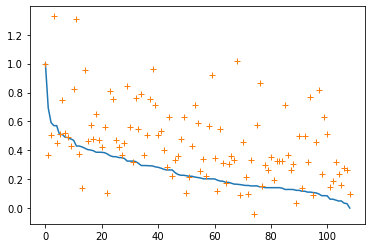

In [720]:
pyplot.plot(Y)
pyplot.plot(Wye,'+')
